<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NaiveBayes.**

In [0]:
# biblioteca
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from io import StringIO
from yellowbrick.classifier import ConfusionMatrix

In [0]:
# simula a leitura csv
arq = StringIO("""checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,4,'life insurance',53,none,own,1,skilled,1,none,yes,good
0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,2,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,4,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,2,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad
0<=X<200,12,'existing paid','new car',1295,<100,<1,3,'female div/dep/mar',none,1,car,25,none,rent,1,skilled,1,none,yes,bad
<0,48,'existing paid',business,4308,<100,<1,3,'female div/dep/mar',none,4,'life insurance',24,none,rent,1,skilled,1,none,yes,bad
0<=X<200,12,'existing paid',radio/tv,1567,<100,1<=X<4,1,'female div/dep/mar',none,1,car,22,none,own,1,skilled,1,yes,yes,good
<0,24,'critical/other existing credit','new car',1199,<100,>=7,4,'male single',none,4,car,60,none,own,2,'unskilled resident',1,none,yes,bad
<0,15,'existing paid','new car',1403,<100,1<=X<4,2,'female div/dep/mar',none,4,car,28,none,rent,1,skilled,1,none,yes,good
<0,24,'existing paid',radio/tv,1282,100<=X<500,1<=X<4,4,'female div/dep/mar',none,2,car,32,none,own,1,'unskilled resident',1,none,yes,bad
'no checking',24,'critical/other existing credit',radio/tv,2424,'no known savings',>=7,4,'male single',none,4,'life insurance',53,none,own,2,skilled,1,none,yes,good
<0,30,'no credits/all paid',business,8072,'no known savings',<1,2,'male single',none,3,car,25,bank,own,3,skilled,1,none,yes,good
0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,2,'no known property',44,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',24,'existing paid',radio/tv,3430,500<=X<1000,>=7,3,'male single',none,2,car,31,none,own,1,skilled,2,yes,yes,good
'no checking',9,'critical/other existing credit','new car',2134,<100,1<=X<4,4,'male single',none,4,car,48,none,own,3,skilled,1,yes,yes,good
<0,6,'existing paid',radio/tv,2647,500<=X<1000,1<=X<4,2,'male single',none,3,'real estate',44,none,rent,1,skilled,2,none,yes,good
<0,10,'critical/other existing credit','new car',2241,<100,<1,1,'male single',none,3,'real estate',48,none,rent,2,'unskilled resident',2,none,no,good
0<=X<200,12,'critical/other existing credit','used car',1804,100<=X<500,<1,3,'male single',none,4,'life insurance',44,none,own,1,skilled,1,none,yes,good
'no checking',10,'critical/other existing credit',furniture/equipment,2069,'no known savings',1<=X<4,2,'male mar/wid',none,1,car,26,none,own,2,skilled,1,none,no,good
<0,6,'existing paid',furniture/equipment,1374,<100,1<=X<4,1,'male single',none,2,'real estate',36,bank,own,1,'unskilled resident',1,yes,yes,good
'no checking',6,'no credits/all paid',radio/tv,426,<100,>=7,4,'male mar/wid',none,4,car,39,none,own,1,'unskilled resident',1,none,yes,good
>=200,12,'all paid',radio/tv,409,>=1000,1<=X<4,3,'female div/dep/mar',none,3,'real estate',42,none,rent,2,skilled,1,none,yes,good
0<=X<200,7,'existing paid',radio/tv,2415,<100,1<=X<4,3,'male single',guarantor,2,'real estate',34,none,own,1,skilled,1,none,yes,good
<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,4,'no known property',63,none,own,2,skilled,1,yes,yes,bad
0<=X<200,18,'existing paid',business,1913,>=1000,<1,3,'male mar/wid',none,3,'real estate',36,bank,own,1,skilled,1,yes,yes,good
<0,24,'existing paid',furniture/equipment,4020,<100,1<=X<4,2,'male single',none,2,car,27,stores,own,1,skilled,1,none,yes,good
0<=X<200,18,'existing paid','new car',5866,100<=X<500,1<=X<4,2,'male single',none,2,car,30,none,own,2,skilled,1,yes,yes,good
'no checking',12,'critical/other existing credit',business,1264,'no known savings',>=7,4,'male single',none,4,'no known property',57,none,rent,1,'unskilled resident',1,none,yes,good
>=200,12,'existing paid',furniture/equipment,1474,<100,<1,4,'female div/dep/mar',none,1,'life insurance',33,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,45,'critical/other existing credit',radio/tv,4746,<100,<1,4,'male single',none,2,'life insurance',25,none,own,2,'unskilled resident',1,none,yes,bad
'no checking',48,'critical/other existing credit',education,6110,<100,1<=X<4,1,'male single',none,3,'no known property',31,bank,'for free',1,skilled,1,yes,yes,good
>=200,18,'existing paid',radio/tv,2100,<100,1<=X<4,4,'male single','co applicant',2,'real estate',37,stores,own,1,skilled,1,none,yes,bad
>=200,10,'existing paid','domestic appliance',1225,<100,1<=X<4,2,'male single',none,2,car,37,none,own,1,skilled,1,yes,yes,good
0<=X<200,9,'existing paid',radio/tv,458,<100,1<=X<4,4,'male single',none,3,'real estate',24,none,own,1,skilled,1,none,yes,good
'no checking',30,'existing paid',radio/tv,2333,500<=X<1000,>=7,4,'male single',none,2,car,30,bank,own,1,'high qualif/self emp/mgmt',1,none,yes,good
0<=X<200,12,'existing paid',radio/tv,1158,500<=X<1000,1<=X<4,3,'male div/sep',none,1,car,26,none,own,1,skilled,1,yes,yes,good
0<=X<200,18,'delayed previously',repairs,6204,<100,1<=X<4,2,'male single',none,4,'real estate',44,none,own,1,'unskilled resident',2,yes,yes,good
<0,30,'critical/other existing credit','used car',6187,100<=X<500,4<=X<7,1,'male mar/wid',none,4,car,24,none,rent,2,skilled,1,none,yes,good
<0,48,'critical/other existing credit','used car',6143,<100,>=7,4,'female div/dep/mar',none,4,'no known property',58,stores,'for free',2,'unskilled resident',1,none,yes,bad
'no checking',11,'critical/other existing credit','new car',1393,<100,<1,4,'female div/dep/mar',none,4,car,35,none,own,2,'high qualif/self emp/mgmt',1,none,yes,good
'no checking',36,'existing paid',radio/tv,2299,500<=X<1000,>=7,4,'male single',none,4,car,39,none,own,1,skilled,1,none,yes,good
<0,6,'existing paid','used car',1352,500<=X<1000,unemployed,1,'female div/dep/mar',none,2,'life insurance',23,none,rent,1,'unemp/unskilled non res',1,yes,yes,good
'no checking',11,'critical/other existing credit','new car',7228,<100,1<=X<4,1,'male single',none,4,'life insurance',39,none,own,2,'unskilled resident',1,none,yes,good
'no checking',12,'existing paid',radio/tv,2073,100<=X<500,1<=X<4,4,'female div/dep/mar','co applicant',2,'real estate',28,none,own,1,skilled,1,none,yes,good
0<=X<200,24,'delayed previously',furniture/equipment,2333,'no known savings',<1,4,'male single',none,2,'life insurance',29,bank,own,1,'unskilled resident',1,none,yes,good
0<=X<200,27,'delayed previously','used car',5965,<100,>=7,1,'male single',none,2,car,30,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid',radio/tv,1262,<100,1<=X<4,3,'male single',none,2,car,25,none,own,1,skilled,1,none,yes,good
'no checking',18,'existing paid','used car',3378,'no known savings',1<=X<4,2,'male single',none,1,'life insurance',31,none,own,1,skilled,1,yes,yes,good
0<=X<200,36,'delayed previously','new car',2225,<100,>=7,4,'male single',none,4,'no known property',57,bank,'for free',2,skilled,1,yes,yes,bad
'no checking',6,'all paid','new car',783,'no known savings',1<=X<4,1,'male single',guarantor,2,'real estate',26,stores,own,1,'unskilled resident',2,none,yes,good
0<=X<200,12,'existing paid',radio/tv,6468,'no known savings',unemployed,2,'male single',none,1,'no known property',52,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',36,'critical/other existing credit',radio/tv,9566,<100,1<=X<4,2,'female div/dep/mar',none,2,car,31,stores,own,2,skilled,1,none,yes,good
>=200,18,'existing paid','new car',1961,<100,>=7,3,'female div/dep/mar',none,2,car,23,none,own,1,'high qualif/self emp/mgmt',1,none,yes,good
<0,36,'critical/other existing credit',furniture/equipment,6229,<100,<1,4,'female div/dep/mar','co applicant',4,'no known property',23,none,rent,2,'unskilled resident',1,yes,yes,bad
0<=X<200,9,'existing paid',business,1391,<100,1<=X<4,2,'male mar/wid',none,1,'real estate',27,bank,own,1,skilled,1,yes,yes,good
0<=X<200,15,'critical/other existing credit',radio/tv,1537,'no known savings',>=7,4,'male single',guarantor,4,'real estate',50,none,own,2,skilled,1,yes,yes,good
0<=X<200,36,'no credits/all paid',business,1953,<100,>=7,4,'male single',none,4,'no known property',61,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
0<=X<200,48,'no credits/all paid',business,14421,<100,1<=X<4,2,'male single',none,2,car,25,none,own,1,skilled,1,yes,yes,bad
'no checking',24,'existing paid',radio/tv,3181,<100,<1,4,'female div/dep/mar',none,4,'life insurance',26,none,own,1,skilled,1,yes,yes,good
'no checking',27,'existing paid',repairs,5190,'no known savings',>=7,4,'male single',none,4,'life insurance',48,none,own,4,skilled,2,yes,yes,good
'no checking',12,'existing paid',radio/tv,2171,<100,<1,2,'female div/dep/mar',none,2,car,29,bank,own,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid','new car',1007,>=1000,1<=X<4,4,'male mar/wid',none,1,'real estate',22,none,own,1,skilled,1,none,yes,good
'no checking',36,'existing paid',education,1819,<100,1<=X<4,4,'male single',none,4,'no known property',37,stores,'for free',1,skilled,1,yes,yes,bad
'no checking',36,'existing paid',radio/tv,2394,'no known savings',1<=X<4,4,'female div/dep/mar',none,4,car,25,none,own,1,skilled,1,none,yes,good
'no checking',36,'existing paid','used car',8133,<100,1<=X<4,1,'female div/dep/mar',none,2,'life insurance',30,bank,own,1,skilled,1,none,yes,good
'no checking',7,'critical/other existing credit',radio/tv,730,'no known savings',>=7,4,'male single',none,2,'life insurance',46,none,rent,2,'unskilled resident',1,yes,yes,good
<0,8,'critical/other existing credit',other,1164,<100,>=7,3,'male single',none,4,'no known property',51,bank,'for free',2,'high qualif/self emp/mgmt',2,yes,yes,good
0<=X<200,42,'critical/other existing credit',business,5954,<100,4<=X<7,2,'female div/dep/mar',none,1,'real estate',41,bank,own,2,'unskilled resident',1,none,yes,good
<0,36,'existing paid',education,1977,'no known savings',>=7,4,'male single',none,4,'no known property',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,12,'critical/other existing credit','used car',1526,<100,>=7,4,'male single',none,4,'no known property',66,none,'for free',2,'high qualif/self emp/mgmt',1,none,yes,good
<0,42,'existing paid',radio/tv,3965,<100,<1,4,'male single',none,3,car,34,none,own,1,skilled,1,none,yes,bad
0<=X<200,11,'delayed previously',radio/tv,4771,<100,4<=X<7,2,'male single',none,4,'life insurance',51,none,own,1,skilled,1,none,yes,good
'no checking',54,'no credits/all paid','used car',9436,'no known savings',1<=X<4,2,'male single',none,2,'life insurance',39,none,own,1,'unskilled resident',2,none,yes,good
0<=X<200,30,'existing paid',furniture/equipment,3832,<100,<1,2,'male mar/wid',none,1,'life insurance',22,none,own,1,skilled,1,none,yes,good
'no checking',24,'existing paid',radio/tv,5943,'no known savings',<1,1,'female div/dep/mar',none,1,car,44,none,own,2,skilled,1,yes,yes,bad
'no checking',15,'existing paid',radio/tv,1213,500<=X<1000,>=7,4,'male single',none,3,'life insurance',47,stores,own,1,skilled,1,yes,yes,good
'no checking',18,'existing paid',business,1568,100<=X<500,1<=X<4,3,'female div/dep/mar',none,4,'life insurance',24,none,rent,1,'unskilled resident',1,none,yes,good
<0,24,'existing paid',other,1755,<100,>=7,4,'female div/dep/mar',guarantor,4,'real estate',58,none,own,1,'unskilled resident',1,yes,yes,good
<0,10,'existing paid',radio/tv,2315,<100,>=7,3,'male single',none,4,'real estate',52,none,own,1,'unskilled resident',1,none,yes,good
'no checking',12,'critical/other existing credit',business,1412,<100,1<=X<4,4,'female div/dep/mar',guarantor,2,'real estate',29,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,18,'critical/other existing credit',furniture/equipment,1295,<100,<1,4,'female div/dep/mar',none,1,'life insurance',27,none,own,2,skilled,1,none,yes,good
0<=X<200,36,'existing paid',education,12612,100<=X<500,1<=X<4,1,'male single',none,4,'no known property',47,none,'for free',1,skilled,2,yes,yes,bad
<0,18,'existing paid','new car',2249,100<=X<500,4<=X<7,4,'male single',none,3,car,30,none,own,1,'high qualif/self emp/mgmt',2,yes,yes,good
<0,12,'no credits/all paid',repairs,1108,<100,4<=X<7,4,'male single',none,3,'real estate',28,none,own,2,skilled,1,none,yes,bad
'no checking',12,'critical/other existing credit',radio/tv,618,<100,>=7,4,'male single',none,4,'real estate',56,none,own,1,skilled,1,none,yes,good
<0,12,'critical/other existing credit','used car',1409,<100,>=7,4,'male single',none,3,'real estate',54,none,own,1,skilled,1,none,yes,good
'no checking',12,'critical/other existing credit',radio/tv,797,'no known savings',>=7,4,'female div/dep/mar',none,3,'life insurance',33,bank,own,1,'unskilled resident',2,none,yes,bad
>=200,24,'critical/other existing credit',furniture/equipment,3617,'no known savings',>=7,4,'male single','co applicant',4,'no known property',20,none,rent,2,skilled,1,none,yes,good
0<=X<200,12,'existing paid','new car',1318,>=1000,>=7,4,'male single',none,4,'real estate',54,none,own,1,skilled,1,yes,yes,good
0<=X<200,54,'no credits/all paid',business,15945,<100,<1,3,'male single',none,4,'no known property',58,none,rent,1,skilled,1,yes,yes,bad
'no checking',12,'critical/other existing credit',education,2012,'no known savings',4<=X<7,4,'female div/dep/mar',none,2,car,61,none,own,1,skilled,1,none,yes,good
0<=X<200,18,'existing paid',business,2622,100<=X<500,1<=X<4,4,'male single',none,4,car,34,none,own,1,skilled,1,none,yes,good
0<=X<200,36,'critical/other existing credit',radio/tv,2337,<100,>=7,4,'male single',none,4,'real estate',36,none,own,1,skilled,1,none,yes,good
0<=X<200,20,'delayed previously','used car',7057,'no known savings',4<=X<7,3,'male single',none,4,'life insurance',36,bank,rent,2,'high qualif/self emp/mgmt',2,yes,yes,good
'no checking',24,'existing paid','new car',1469,100<=X<500,>=7,4,'male mar/wid',none,4,'real estate',41,none,rent,1,'unskilled resident',1,none,yes,good
0<=X<200,36,'existing paid',radio/tv,2323,<100,4<=X<7,4,'male single',none,4,car,24,none,rent,1,skilled,1,none,yes,good
'no checking',6,'delayed previously',radio/tv,932,<100,1<=X<4,3,'female div/dep/mar',none,2,'real estate',24,none,own,1,skilled,1,none,yes,good
0<=X<200,9,'critical/other existing credit',furniture/equipment,1919,<100,4<=X<7,4,'male single',none,3,car,35,none,rent,1,skilled,1,yes,yes,good
'no checking',12,'existing paid','used car',2445,'no known savings',<1,2,'male mar/wid',none,4,car,26,none,rent,1,skilled,1,yes,yes,good
0<=X<200,24,'critical/other existing credit',other,11938,<100,1<=X<4,2,'male single','co applicant',3,car,39,none,own,2,'high qualif/self emp/mgmt',2,yes,yes,bad
'no checking',18,'all paid','new car',6458,<100,>=7,2,'male single',none,4,'no known property',39,bank,own,2,'high qualif/self emp/mgmt',2,yes,yes,bad
0<=X<200,12,'existing paid','new car',6078,<100,4<=X<7,2,'male single',none,2,car,32,none,own,1,skilled,1,none,yes,good
<0,24,'existing paid',furniture/equipment,7721,'no known savings',<1,1,'female div/dep/mar',none,2,'life insurance',30,none,own,1,skilled,1,yes,no,good
0<=X<200,14,'existing paid',business,1410,500<=X<1000,>=7,1,'male mar/wid',none,2,'real estate',35,none,own,1,skilled,1,yes,yes,good
0<=X<200,6,'delayed previously',business,1449,100<=X<500,>=7,1,'male div/sep',none,2,car,31,bank,own,2,skilled,2,none,yes,good
>=200,15,'existing paid',education,392,<100,<1,4,'female div/dep/mar',none,4,'life insurance',23,none,rent,1,skilled,1,yes,yes,good
0<=X<200,18,'existing paid','new car',6260,<100,4<=X<7,3,'male single',none,3,'real estate',28,none,rent,1,'unskilled resident',1,none,yes,good
'no checking',36,'critical/other existing credit','new car',7855,<100,1<=X<4,4,'female div/dep/mar',none,2,'real estate',25,stores,own,2,skilled,1,yes,yes,bad
<0,12,'existing paid',radio/tv,1680,500<=X<1000,>=7,3,'male mar/wid',none,1,'real estate',35,none,own,1,skilled,1,none,yes,good
'no checking',48,'critical/other existing credit',radio/tv,3578,'no known savings',>=7,4,'male single',none,1,'real estate',47,none,own,1,skilled,1,yes,yes,good
<0,42,'existing paid',radio/tv,7174,'no known savings',4<=X<7,4,'female div/dep/mar',none,3,car,30,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,10,'critical/other existing credit',furniture/equipment,2132,'no known savings',<1,2,'female div/dep/mar','co applicant',3,'real estate',27,none,rent,2,skilled,1,none,no,good
<0,33,'critical/other existing credit',furniture/equipment,4281,500<=X<1000,1<=X<4,1,'female div/dep/mar',none,4,car,23,none,own,2,skilled,1,none,yes,bad
0<=X<200,12,'critical/other existing credit','new car',2366,500<=X<1000,4<=X<7,3,'male div/sep',none,3,car,36,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,21,'existing paid',radio/tv,1835,<100,1<=X<4,3,'female div/dep/mar',none,2,'real estate',25,none,own,2,skilled,1,yes,yes,bad
'no checking',24,'critical/other existing credit','used car',3868,<100,>=7,4,'female div/dep/mar',none,2,car,41,none,rent,2,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid',furniture/equipment,1768,<100,1<=X<4,3,'male single',none,2,'real estate',24,none,rent,1,'unskilled resident',1,none,yes,good
>=200,10,'critical/other existing credit','new car',781,<100,>=7,4,'male single',none,4,'no known property',63,none,'for free',2,skilled,1,yes,yes,good
0<=X<200,18,'existing paid',furniture/equipment,1924,'no known savings',<1,4,'female div/dep/mar',none,3,'real estate',27,none,rent,1,skilled,1,none,yes,bad
<0,12,'critical/other existing credit','new car',2121,<100,1<=X<4,4,'male single',none,2,'life insurance',30,none,own,2,skilled,1,none,yes,good
<0,12,'existing paid',radio/tv,701,<100,1<=X<4,4,'male mar/wid',none,2,'real estate',40,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,12,'existing paid',repairs,639,<100,1<=X<4,4,'male single',none,2,car,30,none,own,1,skilled,1,none,yes,bad
0<=X<200,12,'critical/other existing credit','used car',1860,<100,unemployed,4,'male single',none,2,car,34,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
<0,12,'critical/other existing credit','new car',3499,<100,1<=X<4,3,'female div/dep/mar','co applicant',2,'real estate',29,none,own,2,skilled,1,none,yes,bad
0<=X<200,48,'existing paid','new car',8487,'no known savings',4<=X<7,1,'female div/dep/mar',none,2,car,24,none,own,1,skilled,1,none,yes,good
<0,36,'delayed previously',education,6887,<100,1<=X<4,4,'male single',none,3,'life insurance',29,stores,own,1,skilled,1,yes,yes,bad
'no checking',15,'existing paid',furniture/equipment,2708,<100,<1,2,'male single',none,3,'life insurance',27,bank,own,2,'unskilled resident',1,none,yes,good
'no checking',18,'existing paid',furniture/equipment,1984,<100,1<=X<4,4,'male single',none,4,'no known property',47,bank,'for free',2,skilled,1,none,yes,good
'no checking',60,'existing paid',radio/tv,10144,100<=X<500,4<=X<7,2,'female div/dep/mar',none,4,'real estate',21,none,own,1,skilled,1,yes,yes,good
'no checking',12,'critical/other existing credit',radio/tv,1240,'no known savings',>=7,4,'female div/dep/mar',none,2,'real estate',38,none,own,2,skilled,1,yes,yes,good
'no checking',27,'delayed previously','used car',8613,>=1000,1<=X<4,2,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
0<=X<200,12,'existing paid',radio/tv,766,500<=X<1000,1<=X<4,4,'male single',none,3,'real estate',66,none,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,15,'critical/other existing credit',radio/tv,2728,'no known savings',4<=X<7,4,'male single',guarantor,2,'real estate',35,bank,own,3,skilled,1,yes,yes,good
>=200,12,'existing paid',radio/tv,1881,<100,1<=X<4,2,'female div/dep/mar',none,2,car,44,none,rent,1,'unskilled resident',1,yes,yes,good
>=200,6,'existing paid','new car',709,>=1000,<1,2,'male mar/wid',none,2,'real estate',27,none,own,1,'unemp/unskilled non res',1,none,no,good
0<=X<200,36,'existing paid',radio/tv,4795,<100,<1,4,'female div/dep/mar',none,1,'no known property',30,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,27,'existing paid',radio/tv,3416,<100,1<=X<4,3,'male single',none,2,car,27,none,own,1,'high qualif/self emp/mgmt',1,none,yes,good
<0,18,'existing paid',furniture/equipment,2462,<100,1<=X<4,2,'male single',none,2,car,22,none,own,1,skilled,1,none,yes,bad
'no checking',21,'critical/other existing credit',furniture/equipment,2288,<100,<1,4,'female div/dep/mar',none,4,'life insurance',23,none,own,1,skilled,1,yes,yes,good
0<=X<200,48,'all paid',business,3566,100<=X<500,4<=X<7,4,'male single',none,2,car,30,none,own,1,skilled,1,none,yes,good
<0,6,'critical/other existing credit','new car',860,<100,>=7,1,'female div/dep/mar',none,4,'no known property',39,none,own,2,skilled,1,yes,yes,good
'no checking',12,'critical/other existing credit','new car',682,100<=X<500,4<=X<7,4,'female div/dep/mar',none,3,car,51,none,own,2,skilled,1,yes,yes,good
<0,36,'critical/other existing credit',furniture/equipment,5371,<100,1<=X<4,3,'male single',guarantor,2,'life insurance',28,none,own,2,skilled,1,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,1582,>=1000,>=7,4,'male single',none,4,car,46,none,own,2,skilled,1,none,yes,good
'no checking',6,'existing paid',radio/tv,1346,100<=X<500,>=7,2,'male single',none,4,'no known property',42,bank,'for free',1,skilled,2,yes,yes,good
'no checking',10,'existing paid',radio/tv,1924,<100,1<=X<4,1,'male single',none,4,'life insurance',38,none,own,1,skilled,1,yes,no,good
>=200,36,'existing paid',radio/tv,5848,<100,1<=X<4,4,'male single',none,1,car,24,none,own,1,skilled,1,none,yes,good
0<=X<200,24,'critical/other existing credit','used car',7758,>=1000,>=7,2,'female div/dep/mar',none,4,'no known property',29,none,rent,1,skilled,1,none,yes,good
0<=X<200,24,'delayed previously',business,6967,100<=X<500,4<=X<7,4,'male single',none,4,car,36,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,12,'existing paid',furniture/equipment,1282,<100,1<=X<4,2,'female div/dep/mar',none,4,car,20,none,rent,1,skilled,1,none,yes,bad
<0,9,'critical/other existing credit',repairs,1288,100<=X<500,>=7,3,'male single',guarantor,4,'real estate',48,none,own,2,skilled,2,none,no,good
<0,12,'all paid',retraining,339,<100,>=7,4,'male mar/wid',none,1,car,45,bank,own,1,'unskilled resident',1,none,yes,good
0<=X<200,24,'existing paid','new car',3512,100<=X<500,4<=X<7,2,'male single',none,3,car,38,bank,own,2,skilled,1,yes,yes,good
'no checking',6,'critical/other existing credit',radio/tv,1898,'no known savings',1<=X<4,1,'male single',none,2,'real estate',34,none,own,2,'unskilled resident',2,none,yes,good
'no checking',24,'critical/other existing credit',radio/tv,2872,100<=X<500,>=7,3,'male single',none,4,'real estate',36,none,own,1,skilled,2,yes,yes,good
'no checking',18,'critical/other existing credit','new car',1055,<100,<1,4,'female div/dep/mar',none,1,'life insurance',30,none,own,2,skilled,1,none,yes,good
'no checking',15,'existing paid','domestic appliance',1262,500<=X<1000,4<=X<7,4,'male single',none,3,'life insurance',36,none,own,2,skilled,1,yes,yes,good
0<=X<200,10,'existing paid','new car',7308,<100,unemployed,2,'male single',none,4,'no known property',70,bank,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',36,'existing paid','new car',909,500<=X<1000,>=7,4,'male single',none,4,'life insurance',36,none,own,1,skilled,1,none,yes,good
'no checking',6,'existing paid',furniture/equipment,2978,500<=X<1000,1<=X<4,1,'male single',none,2,car,32,none,own,1,skilled,1,yes,yes,good
<0,18,'existing paid',furniture/equipment,1131,<100,unemployed,4,'female div/dep/mar',none,2,car,33,none,own,1,skilled,1,none,yes,bad
0<=X<200,11,'existing paid',furniture/equipment,1577,>=1000,<1,4,'female div/dep/mar',none,1,'real estate',20,none,own,1,skilled,1,none,yes,good
'no checking',24,'existing paid',furniture/equipment,3972,<100,4<=X<7,2,'female div/dep/mar',none,4,'life insurance',25,none,rent,1,skilled,1,yes,yes,good
0<=X<200,24,'critical/other existing credit',business,1935,<100,>=7,4,'male div/sep',none,4,'real estate',31,none,own,2,skilled,1,yes,yes,bad
<0,15,'no credits/all paid','new car',950,<100,>=7,4,'male single',none,3,car,33,none,rent,2,skilled,2,none,yes,bad
'no checking',12,'existing paid',furniture/equipment,763,<100,1<=X<4,4,'female div/dep/mar',none,1,'real estate',26,none,own,1,skilled,1,yes,yes,good
0<=X<200,24,'delayed previously',furniture/equipment,2064,<100,unemployed,3,'female div/dep/mar',none,2,'life insurance',34,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
0<=X<200,8,'existing paid',radio/tv,1414,<100,1<=X<4,4,'male single',guarantor,2,'real estate',33,none,own,1,skilled,1,none,no,good
<0,21,'delayed previously',education,3414,<100,<1,2,'male single',none,1,'life insurance',26,none,own,2,skilled,1,none,yes,bad
'no checking',30,'all paid','used car',7485,'no known savings',unemployed,4,'female div/dep/mar',none,1,'real estate',53,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,12,'existing paid',furniture/equipment,2577,<100,1<=X<4,2,'male div/sep',none,1,car,42,none,own,1,skilled,1,none,yes,good
<0,6,'critical/other existing credit',radio/tv,338,500<=X<1000,>=7,4,'male single',none,4,car,52,none,own,2,skilled,1,none,yes,good
'no checking',12,'existing paid',radio/tv,1963,<100,4<=X<7,4,'male single',none,2,car,31,none,rent,2,'high qualif/self emp/mgmt',2,yes,yes,good
<0,21,'critical/other existing credit','new car',571,<100,>=7,4,'male single',none,4,'real estate',65,none,own,2,skilled,1,none,yes,good
'no checking',36,'delayed previously',business,9572,<100,<1,1,'male div/sep',none,1,car,28,none,own,2,skilled,1,none,yes,bad
0<=X<200,36,'delayed previously',business,4455,<100,1<=X<4,2,'male div/sep',none,2,'real estate',30,stores,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,21,'all paid','new car',1647,'no known savings',1<=X<4,4,'male single',none,2,'life insurance',40,none,own,2,'unskilled resident',2,none,yes,bad
'no checking',24,'critical/other existing credit',furniture/equipment,3777,>=1000,1<=X<4,4,'male single',none,4,'real estate',50,none,own,1,skilled,1,yes,yes,good
0<=X<200,18,'critical/other existing credit','new car',884,<100,>=7,4,'male single',none,4,car,36,bank,own,1,skilled,2,yes,yes,bad
'no checking',15,'critical/other existing credit',radio/tv,1360,<100,1<=X<4,4,'male single',none,2,'life insurance',31,none,own,2,skilled,1,none,yes,good
0<=X<200,9,'all paid','used car',5129,<100,>=7,2,'female div/dep/mar',none,4,'no known property',74,bank,'for free',1,'high qualif/self emp/mgmt',2,yes,yes,bad
0<=X<200,16,'critical/other existing credit','new car',1175,<100,unemployed,2,'male single',none,3,car,68,none,'for free',3,'unemp/unskilled non res',1,yes,yes,good
<0,12,'existing paid',radio/tv,674,100<=X<500,4<=X<7,4,'male mar/wid',none,1,'life insurance',20,none,own,1,skilled,1,none,yes,bad
0<=X<200,18,'no credits/all paid',furniture/equipment,3244,<100,1<=X<4,1,'female div/dep/mar',none,4,car,33,bank,own,2,skilled,1,yes,yes,good
'no checking',24,'existing paid',business,4591,>=1000,1<=X<4,2,'male single',none,3,'life insurance',54,none,own,3,'high qualif/self emp/mgmt',1,yes,yes,bad
0<=X<200,48,'no credits/all paid',business,3844,100<=X<500,4<=X<7,4,'male single',none,4,'no known property',34,none,'for free',1,'unskilled resident',2,none,yes,bad
0<=X<200,27,'existing paid',business,3915,<100,1<=X<4,4,'male single',none,2,car,36,none,own,1,skilled,2,yes,yes,bad
'no checking',6,'existing paid',radio/tv,2108,<100,4<=X<7,2,'male mar/wid',none,2,'real estate',29,none,rent,1,skilled,1,none,yes,good
0<=X<200,45,'existing paid',radio/tv,3031,100<=X<500,1<=X<4,4,'male single',guarantor,4,'life insurance',21,none,rent,1,skilled,1,none,yes,bad
0<=X<200,9,'critical/other existing credit',education,1501,<100,>=7,2,'female div/dep/mar',none,3,car,34,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',6,'critical/other existing credit',radio/tv,1382,<100,1<=X<4,1,'female div/dep/mar',none,1,car,28,none,own,2,skilled,1,yes,yes,good
0<=X<200,12,'existing paid',furniture/equipment,951,100<=X<500,<1,4,'female div/dep/mar',none,4,car,27,bank,rent,4,skilled,1,none,yes,bad
0<=X<200,24,'existing paid','used car',2760,'no known savings',>=7,4,'male single',none,4,'no known property',36,bank,'for free',1,skilled,1,yes,yes,good
0<=X<200,18,'delayed previously',furniture/equipment,4297,<100,>=7,4,'male div/sep',none,3,'no known property',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',9,'critical/other existing credit',education,936,500<=X<1000,>=7,4,'male single',none,2,car,52,none,own,2,skilled,1,yes,yes,good
<0,12,'existing paid','new car',1168,<100,1<=X<4,4,'male mar/wid',none,3,'real estate',27,none,own,1,'unskilled resident',1,none,yes,good
'no checking',27,'delayed previously',business,5117,<100,4<=X<7,3,'male single',none,4,car,26,none,own,2,skilled,1,none,yes,good
<0,12,'existing paid',retraining,902,<100,4<=X<7,4,'male mar/wid',none,4,'life insurance',21,none,rent,1,skilled,1,none,yes,bad
'no checking',12,'critical/other existing credit','new car',1495,<100,>=7,4,'male single',none,1,'real estate',38,none,own,2,'unskilled resident',2,none,yes,good
<0,30,'critical/other existing credit','used car',10623,<100,>=7,3,'male single',none,4,'no known property',38,none,'for free',3,'high qualif/self emp/mgmt',2,yes,yes,good
'no checking',12,'critical/other existing credit',furniture/equipment,1935,<100,>=7,4,'male single',none,4,'real estate',43,none,own,3,skilled,1,yes,yes,good
0<=X<200,12,'critical/other existing credit','domestic appliance',1424,<100,4<=X<7,4,'male single',none,3,'life insurance',26,none,own,1,skilled,1,none,yes,good
<0,24,'existing paid',business,6568,<100,1<=X<4,2,'male mar/wid',none,2,car,21,stores,own,1,'unskilled resident',1,none,yes,good
'no checking',12,'existing paid','used car',1413,>=1000,4<=X<7,3,'male single',none,2,'life insurance',55,none,own,1,skilled,1,none,no,good
'no checking',9,'critical/other existing credit',radio/tv,3074,'no known savings',1<=X<4,1,'male single',none,2,'real estate',33,none,own,2,skilled,2,none,yes,good
'no checking',36,'existing paid',radio/tv,3835,'no known savings',>=7,2,'female div/dep/mar',none,4,'real estate',45,none,own,1,'unskilled resident',1,yes,yes,good
<0,27,'no credits/all paid',business,5293,<100,unemployed,2,'male single',none,4,'life insurance',50,stores,own,2,skilled,1,yes,yes,bad
>=200,30,'delayed previously',business,1908,<100,>=7,4,'male single',none,4,'real estate',66,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',36,'critical/other existing credit',radio/tv,3342,'no known savings',>=7,4,'male single',none,2,car,51,none,own,1,skilled,1,yes,yes,good
0<=X<200,6,'critical/other existing credit',retraining,932,'no known savings',4<=X<7,1,'female div/dep/mar',none,3,'life insurance',39,none,own,2,'unskilled resident',1,none,yes,good
<0,18,'no credits/all paid',business,3104,<100,4<=X<7,3,'male single',none,1,'life insurance',31,bank,own,1,skilled,1,yes,yes,good
>=200,36,'existing paid',radio/tv,3913,<100,1<=X<4,2,'male single',none,2,'real estate',23,none,own,1,skilled,1,yes,yes,good
<0,24,'existing paid',furniture/equipment,3021,<100,1<=X<4,2,'male div/sep',none,2,'real estate',24,none,rent,1,'unskilled resident',1,none,yes,good
'no checking',10,'existing paid','new car',1364,<100,1<=X<4,2,'female div/dep/mar',none,4,car,64,none,own,1,skilled,1,yes,yes,good
0<=X<200,12,'existing paid',radio/tv,625,<100,<1,4,'male mar/wid',guarantor,1,'real estate',26,bank,own,1,'unskilled resident',1,none,yes,good
<0,12,'existing paid',education,1200,'no known savings',1<=X<4,4,'female div/dep/mar',none,4,'life insurance',23,bank,rent,1,skilled,1,yes,yes,good
'no checking',12,'existing paid',radio/tv,707,<100,1<=X<4,4,'male single',none,2,'real estate',30,bank,own,2,skilled,1,none,yes,good
'no checking',24,'delayed previously',business,2978,'no known savings',1<=X<4,4,'male single',none,4,'real estate',32,none,own,2,skilled,2,yes,yes,good
'no checking',15,'existing paid','used car',4657,<100,1<=X<4,3,'male single',none,2,car,30,none,own,1,skilled,1,yes,yes,good
'no checking',36,'no credits/all paid',repairs,2613,<100,1<=X<4,4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
0<=X<200,48,'existing paid',radio/tv,10961,>=1000,4<=X<7,1,'male single','co applicant',2,'no known property',27,bank,own,2,skilled,1,yes,yes,bad
<0,12,'existing paid',furniture/equipment,7865,<100,>=7,4,'male single',none,4,'no known property',53,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',9,'existing paid',radio/tv,1478,<100,4<=X<7,4,'male single',none,2,car,22,none,own,1,skilled,1,none,yes,bad
<0,24,'existing paid',furniture/equipment,3149,<100,<1,4,'male single',none,1,'no known property',22,bank,'for free',1,skilled,1,none,yes,good
>=200,36,'existing paid',radio/tv,4210,<100,1<=X<4,4,'male single',none,2,car,26,none,own,1,skilled,1,none,yes,bad
'no checking',9,'existing paid','new car',2507,500<=X<1000,>=7,2,'male single',none,4,'no known property',51,none,'for free',1,'unskilled resident',1,none,yes,good
'no checking',12,'existing paid',radio/tv,2141,100<=X<500,4<=X<7,3,'male single',none,1,'no known property',35,none,own,1,skilled,1,none,yes,good
0<=X<200,18,'existing paid',radio/tv,866,<100,1<=X<4,4,'male mar/wid',guarantor,2,'real estate',25,none,own,1,'unskilled resident',1,none,yes,good
'no checking',4,'critical/other existing credit',radio/tv,1544,<100,4<=X<7,2,'male single',none,1,'real estate',42,none,own,3,'unskilled resident',2,none,yes,good
<0,24,'existing paid',radio/tv,1823,<100,unemployed,4,'male single',none,2,car,30,stores,own,1,'high qualif/self emp/mgmt',2,none,yes,bad
0<=X<200,6,'existing paid','new car',14555,'no known savings',unemployed,1,'male single',none,2,'life insurance',23,none,own,1,'unemp/unskilled non res',1,yes,yes,bad
0<=X<200,21,'existing paid',business,2767,100<=X<500,>=7,4,'male div/sep',none,2,car,61,bank,rent,2,'unskilled resident',1,none,yes,bad
'no checking',12,'critical/other existing credit',radio/tv,1291,<100,1<=X<4,4,'female div/dep/mar',none,2,'life insurance',35,none,own,2,skilled,1,none,yes,good
<0,30,'existing paid',radio/tv,2522,<100,>=7,1,'male single',guarantor,3,'life insurance',39,none,own,1,skilled,2,none,yes,good
<0,24,'existing paid','new car',915,'no known savings',>=7,4,'female div/dep/mar',none,2,car,29,bank,own,1,skilled,1,none,yes,bad
'no checking',6,'existing paid',radio/tv,1595,<100,4<=X<7,3,'male single',none,2,'life insurance',51,none,own,1,skilled,2,none,yes,good
<0,48,'no credits/all paid','used car',4605,<100,>=7,3,'male single',none,4,'no known property',24,none,'for free',2,skilled,2,none,yes,bad
'no checking',12,'critical/other existing credit',business,1185,<100,1<=X<4,3,'female div/dep/mar',none,2,'real estate',27,none,own,2,skilled,1,none,yes,good
'no checking',12,'all paid',retraining,3447,500<=X<1000,1<=X<4,4,'female div/dep/mar',none,3,'real estate',35,none,own,1,'unskilled resident',2,none,yes,good
'no checking',24,'existing paid',business,1258,<100,4<=X<7,4,'male single',none,1,'real estate',25,none,own,1,skilled,1,yes,yes,good
'no checking',12,'critical/other existing credit',radio/tv,717,<100,>=7,4,'male single',none,4,'real estate',52,none,own,3,skilled,1,none,yes,good
'no checking',6,'no credits/all paid','new car',1204,100<=X<500,1<=X<4,4,'male single',none,1,'no known property',35,bank,rent,1,skilled,1,none,no,good
>=200,24,'existing paid',furniture/equipment,1925,<100,1<=X<4,2,'male single',none,2,'real estate',26,none,own,1,skilled,1,none,yes,good
'no checking',18,'existing paid',radio/tv,433,<100,unemployed,3,'female div/dep/mar','co applicant',4,'real estate',22,none,rent,1,skilled,1,none,yes,bad
<0,6,'critical/other existing credit','new car',666,>=1000,4<=X<7,3,'female div/dep/mar',none,4,'real estate',39,none,own,2,'unskilled resident',1,yes,yes,good
>=200,12,'existing paid',furniture/equipment,2251,<100,1<=X<4,1,'female div/dep/mar',none,2,car,46,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,30,'existing paid','new car',2150,<100,1<=X<4,4,'female div/dep/mar',guarantor,2,'no known property',24,bank,own,1,skilled,1,none,yes,bad
'no checking',24,'delayed previously',furniture/equipment,4151,100<=X<500,1<=X<4,2,'male single',none,3,'life insurance',35,none,own,2,skilled,1,none,yes,good
0<=X<200,9,'existing paid',furniture/equipment,2030,'no known savings',4<=X<7,2,'male single',none,1,car,24,none,own,1,skilled,1,yes,yes,good
0<=X<200,60,'delayed previously',radio/tv,7418,'no known savings',1<=X<4,1,'male single',none,1,'real estate',27,none,own,1,'unskilled resident',1,none,yes,good
'no checking',24,'critical/other existing credit',radio/tv,2684,<100,1<=X<4,4,'male single',none,2,'real estate',35,none,own,2,'unskilled resident',1,none,yes,good
<0,12,'all paid',radio/tv,2149,<100,1<=X<4,4,'male div/sep',none,1,'no known property',29,none,'for free',1,skilled,1,none,yes,bad
'no checking',15,'existing paid','used car',3812,100<=X<500,<1,1,'female div/dep/mar',none,4,car,23,none,own,1,skilled,1,yes,yes,good
'no checking',11,'critical/other existing credit',radio/tv,1154,100<=X<500,unemployed,4,'female div/dep/mar',none,4,'real estate',57,none,own,3,'unskilled resident',1,none,yes,good
<0,12,'existing paid',furniture/equipment,1657,<100,1<=X<4,2,'male single',none,2,'real estate',27,none,own,1,skilled,1,none,yes,good
<0,24,'existing paid',radio/tv,1603,<100,>=7,4,'female div/dep/mar',none,4,car,55,none,own,1,skilled,1,none,yes,good
<0,18,'critical/other existing credit','new car',5302,<100,>=7,2,'male single',none,4,'no known property',36,none,'for free',3,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'critical/other existing credit',education,2748,<100,>=7,2,'female div/dep/mar',none,4,'no known property',57,bank,'for free',3,'unskilled resident',1,none,yes,good
'no checking',10,'critical/other existing credit','new car',1231,<100,>=7,3,'male single',none,4,'real estate',32,none,own,2,'unskilled resident',2,none,no,good
0<=X<200,15,'existing paid',radio/tv,802,<100,>=7,4,'male single',none,3,car,37,none,own,1,skilled,2,none,yes,bad
'no checking',36,'critical/other existing credit',business,6304,'no known savings',>=7,4,'male single',none,4,'real estate',36,none,own,2,skilled,1,none,yes,good
'no checking',24,'existing paid',radio/tv,1533,<100,<1,4,'female div/dep/mar',none,3,car,38,stores,own,1,skilled,1,yes,yes,good
<0,14,'existing paid','new car',8978,<100,>=7,1,'male div/sep',none,4,'life insurance',45,none,own,1,'high qualif/self emp/mgmt',1,yes,no,bad
'no checking',24,'existing paid',radio/tv,999,'no known savings',>=7,4,'male single',none,2,car,25,none,own,2,skilled,1,none,yes,good
'no checking',18,'existing paid','new car',2662,'no known savings',4<=X<7,4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no,good
'no checking',12,'critical/other existing credit',furniture/equipment,1402,500<=X<1000,4<=X<7,3,'female div/dep/mar',none,4,car,37,none,rent,1,skilled,1,yes,yes,good
0<=X<200,48,'all paid','new car',12169,'no known savings',unemployed,4,'male single','co applicant',4,'no known property',36,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,48,'existing paid',radio/tv,3060,<100,4<=X<7,4,'male single',none,4,'real estate',28,none,own,2,skilled,1,none,yes,bad
<0,30,'existing paid',repairs,11998,<100,<1,1,'male div/sep',none,1,'no known property',34,none,own,1,'unskilled resident',1,yes,yes,bad
'no checking',9,'existing paid',radio/tv,2697,<100,1<=X<4,1,'male single',none,2,'real estate',32,none,own,1,skilled,2,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,2404,<100,1<=X<4,2,'female div/dep/mar',none,2,car,26,none,own,2,skilled,1,none,yes,good
<0,12,'existing paid',furniture/equipment,1262,'no known savings',>=7,2,'male div/sep',none,4,'life insurance',49,none,own,1,'unskilled resident',1,yes,yes,good
'no checking',6,'existing paid',furniture/equipment,4611,<100,<1,1,'female div/dep/mar',none,4,'life insurance',32,none,own,1,skilled,1,none,yes,bad
'no checking',24,'existing paid',radio/tv,1901,100<=X<500,1<=X<4,4,'male single',none,4,car,29,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',15,'critical/other existing credit','used car',3368,>=1000,>=7,3,'male single',none,4,'no known property',23,none,rent,2,skilled,1,yes,yes,good
'no checking',12,'existing paid',furniture/equipment,1574,<100,1<=X<4,4,'male single',none,2,'real estate',50,none,own,1,skilled,1,none,yes,good
>=200,18,'all paid',radio/tv,1445,'no known savings',4<=X<7,4,'male single',none,4,car,49,bank,own,1,'unskilled resident',1,none,yes,good
'no checking',15,'critical/other existing credit',furniture/equipment,1520,'no known savings',>=7,4,'male single',none,4,'life insurance',63,none,own,1,skilled,1,none,yes,good
0<=X<200,24,'critical/other existing credit','new car',3878,100<=X<500,<1,4,'male div/sep',none,2,car,37,none,own,1,skilled,1,yes,yes,good
<0,47,'existing paid','new car',10722,<100,<1,1,'female div/dep/mar',none,1,'real estate',35,none,own,1,'unskilled resident',1,yes,yes,good
<0,48,'existing paid','used car',4788,<100,4<=X<7,4,'male single',none,3,'life insurance',26,none,own,1,skilled,2,none,yes,good
0<=X<200,48,'delayed previously',other,7582,100<=X<500,unemployed,2,'male single',none,4,'no known property',31,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,12,'existing paid',radio/tv,1092,<100,1<=X<4,4,'female div/dep/mar',guarantor,4,'real estate',49,none,own,2,skilled,1,yes,yes,good
<0,24,'delayed previously',radio/tv,1024,<100,<1,4,'male mar/wid',none,4,'real estate',48,stores,own,1,skilled,1,none,yes,bad
'no checking',12,'existing paid',business,1076,<100,1<=X<4,2,'male mar/wid',none,2,'real estate',26,none,own,1,skilled,1,yes,no,good
0<=X<200,36,'existing paid','used car',9398,<100,<1,1,'male mar/wid',none,4,car,28,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,24,'critical/other existing credit','used car',6419,<100,>=7,2,'female div/dep/mar',none,4,'no known property',44,none,'for free',2,'high qualif/self emp/mgmt',2,yes,yes,good
>=200,42,'critical/other existing credit','used car',4796,<100,>=7,4,'male single',none,4,'no known property',56,none,'for free',1,skilled,1,none,yes,good
'no checking',48,'critical/other existing credit',business,7629,'no known savings',>=7,4,'male div/sep',none,2,car,46,bank,own,2,'high qualif/self emp/mgmt',2,none,yes,good
0<=X<200,48,'existing paid',furniture/equipment,9960,<100,<1,1,'female div/dep/mar',none,2,car,26,none,own,1,skilled,1,yes,yes,bad
'no checking',12,'existing paid','used car',4675,'no known savings',<1,1,'female div/dep/mar',none,4,car,20,none,rent,1,skilled,1,none,yes,good
'no checking',10,'existing paid','new car',1287,'no known savings',>=7,4,'male single','co applicant',2,'life insurance',45,none,own,1,'unskilled resident',1,none,no,good
'no checking',18,'existing paid',furniture/equipment,2515,<100,1<=X<4,3,'male single',none,4,'real estate',43,none,own,1,skilled,1,yes,yes,good
0<=X<200,21,'critical/other existing credit',furniture/equipment,2745,>=1000,4<=X<7,3,'male single',none,2,car,32,none,own,2,skilled,1,yes,yes,good
'no checking',6,'existing paid','new car',672,<100,unemployed,1,'female div/dep/mar',none,4,'real estate',54,none,own,1,'unemp/unskilled non res',1,yes,yes,good
0<=X<200,36,'no credits/all paid',radio/tv,3804,<100,1<=X<4,4,'female div/dep/mar',none,1,car,42,none,own,1,skilled,1,yes,yes,bad
>=200,24,'critical/other existing credit','new car',1344,'no known savings',4<=X<7,4,'male single',none,2,'real estate',37,bank,own,2,'unskilled resident',2,none,yes,bad
<0,10,'critical/other existing credit','new car',1038,<100,4<=X<7,4,'male single','co applicant',3,'life insurance',49,none,own,2,skilled,1,yes,yes,good
'no checking',48,'critical/other existing credit','new car',10127,500<=X<1000,1<=X<4,2,'male single',none,2,'no known property',44,bank,'for free',1,skilled,1,none,yes,bad
'no checking',6,'existing paid',furniture/equipment,1543,>=1000,1<=X<4,4,'male div/sep',none,2,'real estate',33,none,own,1,skilled,1,none,yes,good
'no checking',30,'existing paid','used car',4811,'no known savings',4<=X<7,2,'female div/dep/mar',none,4,'life insurance',24,stores,rent,1,'unskilled resident',1,none,yes,good
<0,12,'existing paid',radio/tv,727,100<=X<500,<1,4,'male mar/wid',none,3,'no known property',33,none,own,1,'unskilled resident',1,yes,yes,bad
0<=X<200,8,'existing paid',furniture/equipment,1237,<100,1<=X<4,3,'female div/dep/mar',none,4,'real estate',24,none,own,1,skilled,1,none,yes,bad
0<=X<200,9,'existing paid','new car',276,<100,1<=X<4,4,'male mar/wid',none,4,'real estate',22,none,rent,1,'unskilled resident',1,none,yes,good
0<=X<200,48,'existing paid',other,5381,'no known savings',unemployed,3,'male single',none,4,'no known property',40,bank,'for free',1,'unemp/unskilled non res',1,yes,yes,good
'no checking',24,'existing paid',furniture/equipment,5511,100<=X<500,1<=X<4,4,'male single',none,1,car,25,stores,own,1,skilled,1,none,yes,good
>=200,24,'existing paid',furniture/equipment,3749,<100,<1,2,'female div/dep/mar',none,4,car,26,none,own,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid','new car',685,<100,4<=X<7,2,'male mar/wid',none,3,car,25,bank,own,1,'unskilled resident',1,none,yes,bad
>=200,4,'existing paid','new car',1494,'no known savings',<1,1,'male single',none,2,'real estate',29,none,own,1,'unskilled resident',2,none,no,good
<0,36,'all paid',furniture/equipment,2746,<100,>=7,4,'male single',none,4,car,31,bank,own,1,skilled,1,none,yes,bad
<0,12,'existing paid',furniture/equipment,708,<100,1<=X<4,2,'male single',guarantor,3,'life insurance',38,none,own,1,'unskilled resident',2,none,yes,good
0<=X<200,24,'existing paid',furniture/equipment,4351,'no known savings',1<=X<4,1,'female div/dep/mar',none,4,'life insurance',48,none,own,1,'unskilled resident',1,yes,yes,good
'no checking',12,'critical/other existing credit',education,701,<100,1<=X<4,4,'male single',none,2,car,32,none,own,2,skilled,1,none,yes,good
<0,15,'delayed previously',furniture/equipment,3643,<100,>=7,1,'female div/dep/mar',none,4,'life insurance',27,none,own,2,'unskilled resident',1,none,yes,good
0<=X<200,30,'critical/other existing credit','new car',4249,<100,unemployed,4,'male mar/wid',none,2,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad
<0,24,'existing paid',radio/tv,1938,<100,<1,4,'male div/sep',none,3,'life insurance',32,none,own,1,skilled,1,none,yes,bad
<0,24,'existing paid','used car',2910,<100,4<=X<7,2,'male single',none,1,'no known property',34,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,18,'existing paid',furniture/equipment,2659,>=1000,1<=X<4,4,'male single',none,2,car,28,none,own,1,skilled,1,none,yes,good
'no checking',18,'critical/other existing credit','new car',1028,<100,1<=X<4,4,'female div/dep/mar',none,3,'real estate',36,none,own,2,skilled,1,none,yes,good
<0,8,'critical/other existing credit','new car',3398,<100,4<=X<7,1,'male single',none,4,'real estate',39,none,own,2,'unskilled resident',1,none,no,good
'no checking',12,'critical/other existing credit',furniture/equipment,5801,'no known savings',>=7,2,'male single',none,4,'life insurance',49,none,rent,1,skilled,1,yes,yes,good
'no checking',24,'existing paid','new car',1525,>=1000,4<=X<7,4,'female div/dep/mar',none,3,car,34,none,own,1,skilled,2,yes,yes,good
>=200,36,'existing paid',radio/tv,4473,<100,>=7,4,'male single',none,2,car,31,none,own,1,skilled,1,none,yes,good
0<=X<200,6,'existing paid',radio/tv,1068,<100,>=7,4,'male single',none,4,car,28,none,own,1,skilled,2,none,yes,good
<0,24,'critical/other existing credit','used car',6615,<100,unemployed,2,'male single',none,4,'no known property',75,none,'for free',2,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',18,'critical/other existing credit',education,1864,100<=X<500,1<=X<4,4,'female div/dep/mar',none,2,'real estate',30,none,own,2,skilled,1,none,yes,bad
0<=X<200,60,'existing paid','new car',7408,100<=X<500,<1,4,'female div/dep/mar',none,2,'life insurance',24,none,own,1,'high qualif/self emp/mgmt',1,none,yes,bad
'no checking',48,'critical/other existing credit','used car',11590,100<=X<500,1<=X<4,2,'female div/dep/mar',none,4,car,24,bank,rent,2,'unskilled resident',1,none,yes,bad
<0,24,'no credits/all paid',furniture/equipment,4110,<100,>=7,3,'male single',none,4,'no known property',23,bank,rent,2,skilled,2,none,yes,bad
<0,6,'critical/other existing credit',furniture/equipment,3384,<100,1<=X<4,1,'male div/sep',none,4,'real estate',44,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,bad
0<=X<200,13,'existing paid',radio/tv,2101,<100,<1,2,'female div/dep/mar',guarantor,4,'life insurance',23,none,own,1,'unskilled resident',1,none,yes,good
<0,15,'existing paid','domestic appliance',1275,'no known savings',1<=X<4,4,'female div/dep/mar',none,2,car,24,none,rent,1,skilled,1,none,yes,bad
<0,24,'existing paid',furniture/equipment,4169,<100,1<=X<4,4,'male single',none,4,'life insurance',28,none,own,1,skilled,1,none,yes,good
0<=X<200,10,'existing paid',furniture/equipment,1521,<100,1<=X<4,4,'male div/sep',none,2,car,31,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,24,'critical/other existing credit',education,5743,<100,<1,2,'female div/dep/mar',none,4,'no known property',24,none,'for free',2,skilled,1,yes,yes,good
<0,21,'existing paid',furniture/equipment,3599,<100,4<=X<7,1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good
0<=X<200,18,'existing paid',radio/tv,3213,500<=X<1000,<1,1,'male mar/wid',none,3,'real estate',25,none,rent,1,skilled,1,none,yes,good
0<=X<200,18,'existing paid',business,4439,<100,>=7,1,'male single','co applicant',1,'real estate',33,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
>=200,10,'existing paid','new car',3949,<100,<1,1,'male single',guarantor,1,'life insurance',37,none,own,1,'unskilled resident',2,none,yes,good
'no checking',15,'critical/other existing credit',radio/tv,1459,<100,1<=X<4,4,'female div/dep/mar',none,2,car,43,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,13,'critical/other existing credit',radio/tv,882,<100,<1,4,'male single',guarantor,4,'real estate',23,none,own,2,skilled,1,none,yes,good
0<=X<200,24,'existing paid',radio/tv,3758,500<=X<1000,unemployed,1,'female div/dep/mar',none,4,'no known property',23,none,rent,1,'unemp/unskilled non res',1,none,yes,good
'no checking',6,'delayed previously',business,1743,100<=X<500,1<=X<4,1,'male single',none,2,'real estate',34,none,own,2,'unskilled resident',1,none,yes,good
0<=X<200,9,'critical/other existing credit',education,1136,>=1000,>=7,4,'male single',none,3,'no known property',32,none,'for free',2,skilled,2,none,yes,bad
'no checking',9,'existing paid','domestic appliance',1236,<100,<1,1,'female div/dep/mar',none,4,'real estate',23,none,rent,1,skilled,1,yes,yes,good
0<=X<200,9,'existing paid',furniture/equipment,959,<100,1<=X<4,1,'female div/dep/mar',none,2,car,29,none,own,1,skilled,1,none,no,bad
'no checking',18,'critical/other existing credit','used car',3229,'no known savings',unemployed,2,'male single',none,4,'no known property',38,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,12,'no credits/all paid',radio/tv,6199,<100,1<=X<4,4,'male single',none,2,'life insurance',28,none,rent,2,skilled,1,yes,yes,bad
'no checking',10,'existing paid',education,727,500<=X<1000,>=7,4,'male single',none,4,'no known property',46,none,'for free',1,skilled,1,yes,yes,good
0<=X<200,24,'existing paid','new car',1246,<100,<1,4,'male single',none,2,'real estate',23,stores,own,1,'unskilled resident',1,none,yes,bad
'no checking',12,'critical/other existing credit',radio/tv,2331,'no known savings',>=7,1,'male single','co applicant',4,'real estate',49,none,own,1,skilled,1,yes,yes,good
'no checking',36,'delayed previously',radio/tv,4463,<100,1<=X<4,4,'male single',none,2,car,26,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',12,'existing paid',radio/tv,776,<100,1<=X<4,4,'male mar/wid',none,2,'real estate',28,none,own,1,skilled,1,none,yes,good
<0,30,'existing paid',furniture/equipment,2406,<100,4<=X<7,4,'female div/dep/mar',none,4,'real estate',23,none,rent,1,skilled,1,none,yes,bad
0<=X<200,18,'existing paid',education,1239,'no known savings',1<=X<4,4,'male single',none,4,'no known property',61,none,'for free',1,skilled,1,none,yes,good
>=200,12,'existing paid',radio/tv,3399,'no known savings',>=7,2,'male single',none,3,car,37,none,own,1,'high qualif/self emp/mgmt',1,none,yes,good
>=200,12,'delayed previously','new car',2247,<100,1<=X<4,2,'female div/dep/mar',none,2,car,36,stores,own,2,skilled,1,yes,yes,good
'no checking',6,'existing paid',furniture/equipment,1766,<100,1<=X<4,1,'male mar/wid',none,2,'life insurance',21,none,rent,1,skilled,1,none,yes,good
<0,18,'existing paid',furniture/equipment,2473,<100,unemployed,4,'male single',none,1,car,25,none,own,1,'unemp/unskilled non res',1,none,yes,bad
'no checking',12,'existing paid',business,1542,<100,4<=X<7,2,'male single',none,4,car,36,none,own,1,skilled,1,yes,yes,good
'no checking',18,'critical/other existing credit','used car',3850,<100,4<=X<7,3,'male single',none,1,car,27,none,own,2,skilled,1,none,yes,good
<0,18,'existing paid',furniture/equipment,3650,<100,<1,1,'female div/dep/mar',none,4,car,22,none,rent,1,skilled,1,none,yes,good
<0,36,'existing paid',furniture/equipment,3446,<100,>=7,4,'male single',none,2,car,42,none,own,1,skilled,2,none,yes,bad
0<=X<200,18,'existing paid',furniture/equipment,3001,<100,4<=X<7,2,'female div/dep/mar',none,4,'real estate',40,none,rent,1,skilled,1,none,yes,good
'no checking',36,'existing paid','new car',3079,'no known savings',1<=X<4,4,'male single',none,4,'real estate',36,none,own,1,skilled,1,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,6070,<100,>=7,3,'male single',none,4,car,33,none,own,2,skilled,1,yes,yes,good
'no checking',10,'critical/other existing credit',furniture/equipment,2146,<100,<1,1,'female div/dep/mar',none,3,'real estate',23,none,rent,2,skilled,1,none,yes,good
'no checking',60,'critical/other existing credit','new car',13756,'no known savings',>=7,2,'male single',none,4,'no known property',63,bank,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,60,'all paid',other,14782,100<=X<500,>=7,3,'female div/dep/mar',none,4,'no known property',60,bank,'for free',2,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,48,'all paid',business,7685,<100,4<=X<7,2,'female div/dep/mar',guarantor,4,car,37,none,rent,1,skilled,1,none,yes,bad
'no checking',18,'delayed previously',radio/tv,2320,<100,unemployed,2,'male mar/wid',none,3,'real estate',34,none,own,2,skilled,1,none,yes,good
'no checking',7,'delayed previously',radio/tv,846,'no known savings',>=7,3,'male single',none,4,'no known property',36,none,'for free',1,skilled,1,none,yes,good
0<=X<200,36,'existing paid','new car',14318,<100,>=7,4,'male single',none,2,'no known property',57,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',6,'critical/other existing credit','new car',362,100<=X<500,1<=X<4,4,'female div/dep/mar',none,4,car,52,none,own,2,'unskilled resident',1,none,yes,good
<0,20,'existing paid',furniture/equipment,2212,'no known savings',4<=X<7,4,'male single',none,4,car,39,none,own,1,skilled,1,yes,yes,good
0<=X<200,18,'existing paid','used car',12976,<100,unemployed,3,'female div/dep/mar',none,4,'no known property',38,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',22,'existing paid','new car',1283,'no known savings',4<=X<7,4,'female div/dep/mar',none,4,'life insurance',25,none,rent,1,skilled,1,none,yes,good
>=200,12,'existing paid','new car',1330,<100,<1,4,'male single',none,1,'real estate',26,none,own,1,skilled,1,none,yes,good
'no checking',30,'delayed previously',business,4272,100<=X<500,1<=X<4,2,'male single',none,2,'life insurance',26,none,own,2,'unskilled resident',1,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,2238,<100,1<=X<4,2,'female div/dep/mar',none,1,car,25,none,own,2,skilled,1,none,yes,good
'no checking',18,'existing paid',radio/tv,1126,'no known savings',<1,4,'female div/dep/mar',none,2,'real estate',21,none,rent,1,skilled,1,yes,yes,good
0<=X<200,18,'critical/other existing credit',furniture/equipment,7374,<100,unemployed,4,'male single',none,4,'life insurance',40,stores,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,15,'critical/other existing credit',business,2326,500<=X<1000,1<=X<4,2,'male single',none,4,car,27,bank,own,1,skilled,1,none,yes,good
'no checking',9,'existing paid',business,1449,<100,4<=X<7,3,'female div/dep/mar',none,2,car,27,none,own,2,skilled,1,none,yes,good
'no checking',18,'existing paid','new car',1820,<100,1<=X<4,2,'male mar/wid',none,2,'life insurance',30,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,12,'existing paid',furniture/equipment,983,>=1000,<1,1,'female div/dep/mar',none,4,'real estate',19,none,rent,1,'unskilled resident',1,none,yes,good
<0,36,'existing paid','new car',3249,<100,4<=X<7,2,'male single',none,4,'no known property',39,bank,'for free',1,'high qualif/self emp/mgmt',2,yes,yes,good
<0,6,'critical/other existing credit',radio/tv,1957,<100,4<=X<7,1,'female div/dep/mar',none,4,car,31,none,own,1,skilled,1,none,yes,good
'no checking',9,'critical/other existing credit',furniture/equipment,2406,<100,unemployed,2,'male single',none,3,car,31,none,own,1,'high qualif/self emp/mgmt',1,none,yes,good
0<=X<200,39,'delayed previously',education,11760,100<=X<500,4<=X<7,2,'male single',none,3,'no known property',32,none,rent,1,skilled,1,yes,yes,good
<0,12,'existing paid',furniture/equipment,2578,<100,unemployed,3,'female div/dep/mar',none,4,'no known property',55,none,'for free',1,'high qualif/self emp/mgmt',1,none,yes,good
<0,36,'critical/other existing credit',furniture/equipment,2348,<100,1<=X<4,3,'male mar/wid',none,2,'life insurance',46,none,own,2,skilled,1,yes,yes,good
0<=X<200,12,'existing paid','new car',1223,<100,>=7,1,'male div/sep',none,1,'real estate',46,none,rent,2,skilled,1,none,yes,bad
'no checking',24,'critical/other existing credit',radio/tv,1516,>=1000,1<=X<4,4,'female div/dep/mar',none,1,'real estate',43,none,own,2,'unskilled resident',1,none,yes,good
'no checking',18,'existing paid',radio/tv,1473,<100,<1,3,'male mar/wid',none,4,'real estate',39,none,own,1,skilled,1,yes,yes,good
0<=X<200,18,'critical/other existing credit',business,1887,'no known savings',1<=X<4,4,'male mar/wid',none,4,'real estate',28,bank,own,2,skilled,1,none,yes,good
'no checking',24,'delayed previously',business,8648,<100,<1,2,'male single',none,2,car,27,bank,own,2,skilled,1,yes,yes,bad
'no checking',14,'delayed previously','new car',802,<100,1<=X<4,4,'male single',none,2,car,27,none,own,2,'unskilled resident',1,none,yes,good
0<=X<200,18,'delayed previously','new car',2899,'no known savings',>=7,4,'male single',none,4,car,43,none,own,1,skilled,2,none,yes,good
0<=X<200,24,'existing paid',radio/tv,2039,<100,<1,1,'male mar/wid',none,1,'life insurance',22,none,own,1,skilled,1,yes,yes,bad
'no checking',24,'critical/other existing credit','used car',2197,'no known savings',4<=X<7,4,'male single',none,4,car,43,none,own,2,skilled,2,yes,yes,good
<0,15,'existing paid',radio/tv,1053,<100,<1,4,'male mar/wid',none,2,'real estate',27,none,own,1,skilled,1,none,no,good
'no checking',24,'existing paid',radio/tv,3235,500<=X<1000,>=7,3,'male div/sep',none,2,car,26,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
>=200,12,'critical/other existing credit','new car',939,500<=X<1000,4<=X<7,4,'male mar/wid',none,2,'real estate',28,none,own,3,skilled,1,yes,yes,bad
0<=X<200,24,'existing paid',radio/tv,1967,<100,>=7,4,'female div/dep/mar',none,4,car,20,none,own,1,skilled,1,yes,yes,good
'no checking',33,'critical/other existing credit','used car',7253,<100,4<=X<7,3,'male single',none,2,car,35,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'critical/other existing credit',business,2292,<100,unemployed,4,'male single',none,2,car,42,stores,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',10,'existing paid','new car',1597,500<=X<1000,1<=X<4,3,'male single',none,2,'no known property',40,none,rent,1,'unskilled resident',2,none,no,good
<0,24,'existing paid','new car',1381,'no known savings',1<=X<4,4,'female div/dep/mar',none,2,'life insurance',35,none,own,1,skilled,1,none,yes,bad
'no checking',36,'critical/other existing credit','used car',5842,<100,>=7,2,'male single',none,2,'life insurance',35,none,own,2,skilled,2,yes,yes,good
<0,12,'existing paid','new car',2579,<100,<1,4,'male single',none,1,'real estate',33,none,own,1,'unskilled resident',2,none,yes,bad
<0,18,'delayed previously',education,8471,'no known savings',1<=X<4,1,'female div/dep/mar',none,2,car,23,none,rent,2,skilled,1,yes,yes,good
'no checking',21,'existing paid','new car',2782,500<=X<1000,4<=X<7,1,'female div/dep/mar',none,2,car,31,bank,own,1,'high qualif/self emp/mgmt',1,none,yes,good
0<=X<200,18,'existing paid','new car',1042,'no known savings',1<=X<4,4,'female div/dep/mar',none,2,'life insurance',33,none,own,1,skilled,1,none,yes,bad
'no checking',15,'existing paid','new car',3186,>=1000,4<=X<7,2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid','used car',2028,'no known savings',1<=X<4,4,'male single',none,2,car,30,none,own,1,skilled,1,none,yes,good
0<=X<200,12,'critical/other existing credit','new car',958,<100,4<=X<7,2,'male single',none,3,'real estate',47,none,own,2,'unskilled resident',2,none,yes,good
'no checking',21,'delayed previously',furniture/equipment,1591,100<=X<500,4<=X<7,4,'male single',none,3,'real estate',34,none,own,2,'high qualif/self emp/mgmt',1,none,yes,good
0<=X<200,12,'existing paid',furniture/equipment,2762,'no known savings',>=7,1,'female div/dep/mar',none,2,'life insurance',25,bank,own,1,skilled,1,yes,yes,bad
0<=X<200,18,'existing paid','used car',2779,<100,1<=X<4,1,'male mar/wid',none,3,car,21,none,rent,1,skilled,1,yes,yes,good
'no checking',28,'critical/other existing credit',radio/tv,2743,<100,>=7,4,'male single',none,2,car,29,none,own,2,skilled,1,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,1149,>=1000,1<=X<4,4,'male single',none,3,'real estate',46,none,own,2,skilled,1,none,yes,good
'no checking',9,'existing paid',furniture/equipment,1313,<100,>=7,1,'male single',none,4,car,20,none,own,1,skilled,1,none,yes,good
<0,18,'critical/other existing credit',repairs,1190,<100,unemployed,2,'female div/dep/mar',none,4,'no known property',55,none,'for free',3,'unemp/unskilled non res',2,none,yes,bad
'no checking',5,'existing paid',business,3448,<100,4<=X<7,1,'male single',none,4,'real estate',74,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,24,'existing paid',other,11328,<100,1<=X<4,2,'male single','co applicant',3,car,29,bank,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,6,'critical/other existing credit',furniture/equipment,1872,<100,unemployed,4,'male single',none,4,'no known property',36,none,'for free',3,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',24,'critical/other existing credit',repairs,2058,<100,1<=X<4,4,'male div/sep',none,2,'real estate',33,none,own,2,skilled,1,yes,yes,good
<0,9,'existing paid',furniture/equipment,2136,<100,1<=X<4,3,'male single',none,2,'real estate',25,none,own,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid',radio/tv,1484,'no known savings',1<=X<4,2,'male mar/wid',none,1,'real estate',25,none,own,1,skilled,1,yes,yes,bad
'no checking',6,'existing paid',repairs,660,500<=X<1000,4<=X<7,2,'male mar/wid',none,4,'real estate',23,none,rent,1,'unskilled resident',1,none,yes,good
'no checking',24,'critical/other existing credit','new car',1287,>=1000,>=7,4,'female div/dep/mar',none,4,'real estate',37,none,own,2,skilled,1,yes,yes,good
<0,42,'critical/other existing credit',repairs,3394,<100,unemployed,4,'male single','co applicant',4,car,65,none,own,2,'unemp/unskilled non res',1,none,yes,good
>=200,12,'all paid',business,609,<100,<1,4,'female div/dep/mar',none,1,'real estate',26,none,own,1,'unemp/unskilled non res',1,none,yes,bad
'no checking',12,'existing paid','new car',1884,<100,>=7,4,'male single',none,4,car,39,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,12,'existing paid',furniture/equipment,1620,<100,1<=X<4,2,'female div/dep/mar','co applicant',3,'life insurance',30,none,own,1,skilled,1,none,yes,good
0<=X<200,20,'delayed previously',other,2629,<100,1<=X<4,2,'male single',none,3,car,29,bank,own,2,skilled,1,yes,yes,good
'no checking',12,'existing paid',education,719,<100,>=7,4,'male single',none,4,car,41,bank,own,1,'unskilled resident',2,none,yes,bad
0<=X<200,48,'critical/other existing credit',furniture/equipment,5096,<100,1<=X<4,2,'female div/dep/mar',none,3,car,30,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',9,'critical/other existing credit',education,1244,'no known savings',>=7,4,'female div/dep/mar',none,4,'life insurance',41,none,rent,2,'unskilled resident',1,none,yes,good
<0,36,'existing paid','new car',1842,<100,<1,4,'female div/dep/mar',none,4,car,34,none,own,1,skilled,1,yes,yes,bad
0<=X<200,7,'existing paid',radio/tv,2576,<100,1<=X<4,2,'male single',guarantor,2,'real estate',35,none,own,1,skilled,1,none,yes,good
>=200,12,'existing paid',furniture/equipment,1424,'no known savings',>=7,3,'female div/dep/mar',none,4,'real estate',55,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,15,'delayed previously',repairs,1512,>=1000,1<=X<4,3,'male mar/wid',none,3,'life insurance',61,stores,own,2,skilled,1,none,yes,bad
'no checking',36,'critical/other existing credit','used car',11054,'no known savings',1<=X<4,4,'male single',none,2,car,30,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',6,'existing paid',radio/tv,518,<100,1<=X<4,3,'female div/dep/mar',none,1,'real estate',29,none,own,1,skilled,1,none,yes,good
'no checking',12,'no credits/all paid',furniture/equipment,2759,<100,>=7,2,'male single',none,4,'life insurance',34,none,own,2,skilled,1,none,yes,good
'no checking',24,'existing paid','used car',2670,<100,>=7,4,'male single',none,4,car,35,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,24,'existing paid','new car',4817,<100,4<=X<7,2,'male single','co applicant',3,'life insurance',31,none,own,1,skilled,1,yes,yes,bad
'no checking',24,'existing paid','used car',2679,<100,<1,4,'female div/dep/mar',none,1,'no known property',29,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,11,'critical/other existing credit','new car',3905,<100,1<=X<4,2,'male single',none,2,'real estate',36,none,rent,2,skilled,2,none,yes,good
<0,12,'existing paid','used car',3386,<100,>=7,3,'male single',none,4,'no known property',35,none,'for free',1,skilled,1,yes,yes,bad
<0,6,'existing paid','domestic appliance',343,<100,<1,4,'female div/dep/mar',none,1,'real estate',27,none,own,1,skilled,1,none,yes,good
'no checking',18,'existing paid',radio/tv,4594,<100,<1,3,'male single',none,2,car,32,none,own,1,skilled,1,yes,yes,good
<0,36,'existing paid',furniture/equipment,3620,<100,1<=X<4,1,'male single',guarantor,2,'life insurance',37,none,own,1,skilled,2,none,yes,good
<0,15,'existing paid','new car',1721,<100,<1,2,'male single',none,3,'real estate',36,none,own,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid',furniture/equipment,3017,<100,<1,3,'female div/dep/mar',none,1,'real estate',34,none,rent,1,'high qualif/self emp/mgmt',1,none,yes,good
0<=X<200,12,'existing paid',retraining,754,'no known savings',>=7,4,'male single',none,4,'life insurance',38,none,own,2,skilled,1,none,yes,good
'no checking',18,'existing paid',business,1950,<100,4<=X<7,4,'male single',none,1,car,34,stores,own,2,skilled,1,yes,yes,good
<0,24,'existing paid','used car',2924,<100,1<=X<4,3,'male single',guarantor,4,'no known property',63,bank,own,1,skilled,2,yes,yes,good
<0,24,'delayed previously',radio/tv,1659,<100,<1,4,'female div/dep/mar',none,2,car,29,none,rent,1,'unskilled resident',1,yes,yes,bad
'no checking',48,'delayed previously',radio/tv,7238,'no known savings',>=7,3,'male single',none,3,car,32,bank,own,2,skilled,2,none,yes,good
'no checking',33,'delayed previously',business,2764,<100,1<=X<4,2,'female div/dep/mar',none,2,car,26,none,own,2,skilled,1,yes,yes,good
'no checking',24,'delayed previously','used car',4679,<100,4<=X<7,3,'male single',none,3,car,35,none,own,2,'unskilled resident',1,yes,yes,good
0<=X<200,24,'existing paid',radio/tv,3092,100<=X<500,<1,3,'male mar/wid',none,2,car,22,none,rent,1,skilled,1,yes,yes,bad
<0,6,'existing paid',education,448,<100,<1,4,'female div/dep/mar',none,4,'life insurance',23,none,own,1,skilled,1,none,yes,bad
<0,9,'existing paid','new car',654,<100,1<=X<4,4,'male single',none,3,car,28,none,own,1,'unskilled resident',1,none,yes,bad
'no checking',6,'existing paid',retraining,1238,'no known savings',unemployed,4,'male single',none,4,'life insurance',36,none,own,1,'high qualif/self emp/mgmt',2,yes,yes,good
0<=X<200,18,'critical/other existing credit',radio/tv,1245,<100,1<=X<4,4,'male mar/wid',none,2,car,33,none,own,1,skilled,1,none,yes,bad
<0,18,'no credits/all paid',furniture/equipment,3114,<100,<1,1,'female div/dep/mar',none,4,'life insurance',26,none,rent,1,skilled,1,none,yes,bad
'no checking',39,'existing paid','used car',2569,500<=X<1000,1<=X<4,4,'male single',none,4,car,24,none,own,1,skilled,1,none,yes,good
>=200,24,'existing paid',radio/tv,5152,<100,4<=X<7,4,'male single',none,2,car,25,bank,own,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid',business,1037,100<=X<500,4<=X<7,3,'male single',none,4,'real estate',39,none,own,1,'unskilled resident',1,none,yes,good
<0,15,'critical/other existing credit',furniture/equipment,1478,<100,>=7,4,'male single',none,4,car,44,none,own,2,skilled,2,yes,yes,good
0<=X<200,12,'critical/other existing credit',radio/tv,3573,<100,1<=X<4,1,'female div/dep/mar',none,1,'real estate',23,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,24,'existing paid','new car',1201,<100,<1,4,'male single',none,1,'life insurance',26,none,own,1,skilled,1,none,yes,good
<0,30,'existing paid',furniture/equipment,3622,>=1000,>=7,4,'female div/dep/mar',none,4,'life insurance',57,none,rent,2,skilled,1,yes,yes,good
'no checking',15,'delayed previously',furniture/equipment,960,>=1000,4<=X<7,3,'female div/dep/mar',none,2,'life insurance',30,none,own,2,skilled,1,none,yes,good
'no checking',12,'critical/other existing credit','new car',1163,500<=X<1000,1<=X<4,4,'male single',none,4,'real estate',44,none,own,1,skilled,1,yes,yes,good
0<=X<200,6,'delayed previously','new car',1209,<100,unemployed,4,'male single',none,4,'life insurance',47,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',12,'existing paid',radio/tv,3077,<100,1<=X<4,2,'male single',none,4,car,52,none,own,1,skilled,1,yes,yes,good
'no checking',24,'existing paid','new car',3757,<100,>=7,4,'female div/dep/mar','co applicant',4,'no known property',62,none,'for free',1,skilled,1,yes,yes,good
'no checking',10,'existing paid','new car',1418,100<=X<500,1<=X<4,3,'male single',none,2,'real estate',35,none,rent,1,'unskilled resident',1,none,no,good
'no checking',6,'existing paid','new car',3518,<100,1<=X<4,2,'male single',guarantor,3,'life insurance',26,none,rent,1,skilled,1,none,yes,good
'no checking',12,'critical/other existing credit',radio/tv,1934,<100,>=7,2,'male single',none,2,'no known property',26,none,own,2,skilled,1,none,yes,good
0<=X<200,27,'no credits/all paid',business,8318,<100,>=7,2,'female div/dep/mar',none,4,'no known property',42,none,'for free',2,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',6,'critical/other existing credit',radio/tv,1237,100<=X<500,1<=X<4,1,'female div/dep/mar',none,1,'life insurance',27,none,own,2,skilled,1,none,yes,good
0<=X<200,6,'existing paid',radio/tv,368,'no known savings',>=7,4,'male single',none,4,'life insurance',38,none,own,1,skilled,1,none,yes,good
<0,12,'critical/other existing credit','new car',2122,<100,1<=X<4,3,'male single',none,2,'real estate',39,none,rent,2,'unskilled resident',2,none,no,good
<0,24,'existing paid',furniture/equipment,2996,'no known savings',1<=X<4,2,'male mar/wid',none,4,car,20,none,own,1,skilled,1,none,yes,bad
0<=X<200,36,'existing paid',furniture/equipment,9034,100<=X<500,<1,4,'male single','co applicant',1,'no known property',29,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',24,'critical/other existing credit',furniture/equipment,1585,<100,4<=X<7,4,'male single',none,3,'life insurance',40,none,own,2,skilled,1,none,yes,good
0<=X<200,18,'existing paid',radio/tv,1301,<100,>=7,4,'male mar/wid',guarantor,2,'real estate',32,none,own,1,'unskilled resident',1,none,yes,good
>=200,6,'critical/other existing credit','new car',1323,100<=X<500,>=7,2,'male div/sep',none,4,car,28,none,own,2,skilled,2,yes,yes,good
<0,24,'existing paid','new car',3123,<100,<1,4,'female div/dep/mar',none,1,'life insurance',27,none,own,1,skilled,1,none,yes,bad
<0,36,'existing paid','used car',5493,<100,>=7,2,'male single',none,4,'no known property',42,none,'for free',1,skilled,2,none,yes,good
>=200,9,'existing paid',radio/tv,1126,100<=X<500,>=7,2,'male div/sep',none,4,'real estate',49,none,own,1,skilled,1,none,yes,good
0<=X<200,24,'critical/other existing credit',radio/tv,1216,100<=X<500,<1,4,'male single',none,4,'no known property',38,bank,own,2,skilled,2,none,yes,bad
<0,24,'existing paid','new car',1207,<100,<1,4,'female div/dep/mar',none,4,'life insurance',24,none,rent,1,skilled,1,none,yes,bad
'no checking',10,'existing paid','new car',1309,'no known savings',1<=X<4,4,'male single',guarantor,4,'life insurance',27,none,own,1,'unskilled resident',1,none,yes,bad
>=200,15,'critical/other existing credit','used car',2360,500<=X<1000,1<=X<4,2,'male single',none,2,car,36,none,own,1,skilled,1,yes,yes,good
0<=X<200,15,'all paid','new car',6850,100<=X<500,unemployed,1,'male single',none,2,'life insurance',34,none,own,1,'high qualif/self emp/mgmt',2,yes,yes,bad
'no checking',24,'existing paid',radio/tv,1413,<100,1<=X<4,4,'male mar/wid',none,2,'life insurance',28,none,own,1,skilled,1,none,yes,good
'no checking',39,'existing paid','used car',8588,100<=X<500,>=7,4,'male single',none,2,car,45,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,12,'existing paid','new car',759,<100,4<=X<7,4,'male single',none,2,'real estate',26,none,own,1,skilled,1,none,yes,bad
'no checking',36,'existing paid','used car',4686,<100,1<=X<4,2,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
>=200,15,'existing paid',business,2687,<100,4<=X<7,2,'male single',none,4,'life insurance',26,none,rent,1,skilled,1,yes,yes,good
0<=X<200,12,'delayed previously',radio/tv,585,<100,1<=X<4,4,'male mar/wid','co applicant',4,'real estate',20,none,rent,2,skilled,1,none,yes,good
'no checking',24,'existing paid','new car',2255,'no known savings',<1,4,'male single',none,1,'life insurance',54,none,own,1,skilled,1,none,yes,good
<0,6,'critical/other existing credit','new car',609,<100,4<=X<7,4,'female div/dep/mar',none,3,'life insurance',37,none,own,2,skilled,1,none,no,good
<0,6,'critical/other existing credit','new car',1361,<100,<1,2,'male single',none,4,'real estate',40,none,own,1,'unskilled resident',2,none,no,good
'no checking',36,'critical/other existing credit',furniture/equipment,7127,<100,<1,2,'female div/dep/mar',none,4,'life insurance',23,none,rent,2,skilled,1,yes,yes,bad
<0,6,'existing paid','new car',1203,100<=X<500,>=7,3,'male single',none,2,'life insurance',43,none,own,1,skilled,1,yes,yes,good
'no checking',6,'critical/other existing credit',radio/tv,700,'no known savings',>=7,4,'male single',none,4,'no known property',36,none,'for free',2,skilled,1,none,yes,good
'no checking',24,'critical/other existing credit',repairs,5507,<100,>=7,3,'male single',none,4,'no known property',44,none,'for free',2,skilled,1,none,yes,good
<0,18,'existing paid',radio/tv,3190,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',24,none,own,1,skilled,1,none,yes,bad
<0,48,'no credits/all paid',furniture/equipment,7119,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
'no checking',24,'existing paid','used car',3488,100<=X<500,4<=X<7,3,'female div/dep/mar',none,4,car,23,none,own,1,skilled,1,none,yes,good
0<=X<200,18,'existing paid',radio/tv,1113,<100,1<=X<4,4,'female div/dep/mar',guarantor,4,'real estate',26,none,own,1,'unskilled resident',2,none,yes,good
0<=X<200,26,'existing paid','used car',7966,<100,<1,2,'male single',none,3,car,30,none,own,2,skilled,1,none,yes,good
'no checking',15,'critical/other existing credit',education,1532,100<=X<500,1<=X<4,4,'female div/dep/mar',none,3,car,31,none,own,1,skilled,1,none,yes,good
'no checking',4,'critical/other existing credit',radio/tv,1503,<100,4<=X<7,2,'male single',none,1,'real estate',42,none,own,2,'unskilled resident',2,none,yes,good
<0,36,'existing paid',radio/tv,2302,<100,1<=X<4,4,'male div/sep',none,4,car,31,none,rent,1,skilled,1,none,yes,bad
<0,6,'existing paid','new car',662,<100,<1,3,'male single',none,4,'real estate',41,none,own,1,'unskilled resident',2,yes,yes,good
0<=X<200,36,'existing paid',education,2273,<100,4<=X<7,3,'male single',none,1,car,32,none,own,2,skilled,2,none,yes,good
0<=X<200,15,'existing paid','new car',2631,100<=X<500,1<=X<4,2,'female div/dep/mar',none,4,car,28,none,rent,2,skilled,1,yes,yes,bad
'no checking',12,'delayed previously','used car',1503,<100,1<=X<4,4,'male mar/wid',none,4,'real estate',41,none,rent,1,skilled,1,none,yes,good
'no checking',24,'existing paid',radio/tv,1311,100<=X<500,4<=X<7,4,'male mar/wid',none,3,'life insurance',26,none,own,1,skilled,1,yes,yes,good
'no checking',24,'existing paid',radio/tv,3105,'no known savings',<1,4,'male single',none,2,car,25,none,own,2,skilled,1,none,yes,good
>=200,21,'critical/other existing credit',education,2319,<100,<1,2,'male div/sep',none,1,car,33,none,rent,1,skilled,1,none,yes,bad
<0,6,'existing paid','new car',1374,'no known savings',unemployed,4,'female div/dep/mar',none,3,'life insurance',75,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,18,'critical/other existing credit',furniture/equipment,3612,<100,>=7,3,'female div/dep/mar',none,4,'life insurance',37,none,own,1,skilled,1,yes,yes,good
<0,48,'existing paid','new car',7763,<100,>=7,4,'male single',none,4,'no known property',42,bank,'for free',1,'high qualif/self emp/mgmt',1,none,yes,bad
>=200,18,'existing paid',furniture/equipment,3049,<100,<1,1,'female div/dep/mar',none,1,'life insurance',45,stores,own,1,'unskilled resident',1,none,yes,good
0<=X<200,12,'existing paid',radio/tv,1534,<100,<1,1,'male mar/wid',none,1,'real estate',23,none,rent,1,skilled,1,none,yes,bad
'no checking',24,'delayed previously','new car',2032,<100,>=7,4,'male single',none,4,'no known property',60,none,'for free',2,skilled,1,yes,yes,good
<0,30,'existing paid',furniture/equipment,6350,'no known savings',>=7,4,'male single',none,4,'life insurance',31,none,own,1,skilled,1,none,yes,bad
>=200,18,'existing paid',furniture/equipment,2864,<100,1<=X<4,2,'male single',none,1,'real estate',34,none,own,1,'unskilled resident',2,none,yes,bad
'no checking',12,'critical/other existing credit','new car',1255,<100,>=7,4,'male single',none,4,'real estate',61,none,own,2,'unskilled resident',1,none,yes,good
<0,24,'delayed previously','new car',1333,<100,unemployed,4,'male single',none,2,'real estate',43,none,'for free',2,skilled,2,none,yes,bad
'no checking',24,'critical/other existing credit','new car',2022,<100,1<=X<4,4,'female div/dep/mar',none,4,car,37,none,own,1,skilled,1,yes,yes,good
'no checking',24,'existing paid',radio/tv,1552,<100,4<=X<7,3,'male single',none,1,car,32,bank,own,1,skilled,2,none,yes,good
<0,12,'all paid',radio/tv,626,<100,1<=X<4,4,'female div/dep/mar',none,4,'real estate',24,bank,own,1,'unskilled resident',1,none,yes,bad
'no checking',48,'critical/other existing credit','used car',8858,'no known savings',4<=X<7,2,'male single',none,1,'no known property',35,none,'for free',2,skilled,1,yes,yes,good
'no checking',12,'critical/other existing credit',repairs,996,'no known savings',4<=X<7,4,'female div/dep/mar',none,4,'real estate',23,none,own,2,skilled,1,none,yes,good
'no checking',6,'all paid',radio/tv,1750,500<=X<1000,>=7,2,'male single',none,4,'life insurance',45,bank,own,1,'unskilled resident',2,none,yes,good
<0,48,'existing paid',radio/tv,6999,<100,4<=X<7,1,'male mar/wid',guarantor,1,'real estate',34,none,own,2,skilled,1,yes,yes,bad
0<=X<200,12,'critical/other existing credit','new car',1995,100<=X<500,<1,4,'male single',none,1,car,27,none,own,1,skilled,1,none,yes,good
0<=X<200,9,'existing paid',education,1199,<100,4<=X<7,4,'female div/dep/mar',none,4,'life insurance',67,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,12,'existing paid',radio/tv,1331,<100,<1,2,'male single',none,1,car,22,stores,own,1,skilled,1,none,yes,bad
0<=X<200,18,'no credits/all paid','new car',2278,100<=X<500,<1,3,'female div/dep/mar',none,3,car,28,none,own,2,skilled,1,none,yes,bad
'no checking',21,'no credits/all paid','new car',5003,'no known savings',1<=X<4,1,'female div/dep/mar',none,4,'life insurance',29,bank,own,2,skilled,1,yes,yes,bad
<0,24,'all paid',furniture/equipment,3552,<100,4<=X<7,3,'male single',none,4,car,27,bank,own,1,skilled,1,none,yes,bad
0<=X<200,18,'critical/other existing credit',furniture/equipment,1928,<100,<1,2,'male single',none,2,'real estate',31,none,own,2,'unskilled resident',1,none,yes,bad
<0,24,'existing paid','used car',2964,'no known savings',>=7,4,'male single',none,4,'no known property',49,bank,'for free',1,skilled,2,yes,yes,good
<0,24,'all paid',radio/tv,1546,<100,4<=X<7,4,'male single',guarantor,4,car,24,bank,rent,1,'unskilled resident',1,none,yes,bad
>=200,6,'delayed previously',radio/tv,683,<100,<1,2,'female div/dep/mar',none,1,'life insurance',29,bank,own,1,skilled,1,none,yes,good
0<=X<200,36,'existing paid','new car',12389,'no known savings',1<=X<4,1,'male single',none,4,'no known property',37,none,'for free',1,skilled,1,yes,yes,bad
0<=X<200,24,'delayed previously',business,4712,'no known savings',1<=X<4,4,'male single',none,2,'life insurance',37,bank,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,24,'delayed previously',radio/tv,1553,100<=X<500,4<=X<7,3,'female div/dep/mar',none,2,'life insurance',23,none,rent,2,skilled,1,yes,yes,good
<0,12,'existing paid','new car',1372,<100,4<=X<7,2,'male div/sep',none,3,car,36,none,own,1,skilled,1,none,yes,bad
'no checking',24,'critical/other existing credit',radio/tv,2578,>=1000,>=7,2,'male single',none,2,car,34,none,own,1,skilled,1,none,yes,good
0<=X<200,48,'existing paid',radio/tv,3979,'no known savings',4<=X<7,4,'male single',none,1,car,41,none,own,2,skilled,2,yes,yes,good
<0,48,'existing paid',radio/tv,6758,<100,1<=X<4,3,'female div/dep/mar',none,2,car,31,none,own,1,skilled,1,yes,yes,bad
<0,24,'existing paid',furniture/equipment,3234,<100,<1,4,'female div/dep/mar',none,4,'real estate',23,none,rent,1,'unskilled resident',1,yes,yes,bad
'no checking',30,'critical/other existing credit',radio/tv,5954,<100,4<=X<7,3,'male single','co applicant',2,car,38,none,own,1,skilled,1,none,yes,good
'no checking',24,'existing paid','used car',5433,'no known savings',unemployed,2,'female div/dep/mar',none,4,'life insurance',26,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,15,'existing paid',business,806,<100,1<=X<4,4,'female div/dep/mar',none,4,'life insurance',22,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,9,'existing paid',radio/tv,1082,<100,>=7,4,'male single',none,4,car,27,none,own,2,'unskilled resident',1,none,yes,good
'no checking',15,'critical/other existing credit',furniture/equipment,2788,<100,4<=X<7,2,'female div/dep/mar','co applicant',3,car,24,bank,own,2,skilled,1,none,yes,good
0<=X<200,12,'existing paid',radio/tv,2930,<100,4<=X<7,2,'female div/dep/mar',none,1,'real estate',27,none,own,1,skilled,1,none,yes,good
'no checking',24,'critical/other existing credit',education,1927,'no known savings',1<=X<4,3,'female div/dep/mar',none,2,car,33,none,own,2,skilled,1,yes,yes,good
0<=X<200,36,'critical/other existing credit','new car',2820,<100,<1,4,'male div/sep',none,4,car,27,none,own,2,skilled,1,none,yes,bad
'no checking',24,'existing paid',retraining,937,<100,<1,4,'male mar/wid',none,3,car,27,none,own,2,'unskilled resident',1,none,yes,good
0<=X<200,18,'critical/other existing credit','new car',1056,<100,>=7,3,'male single',guarantor,3,'real estate',30,bank,own,2,skilled,1,none,yes,bad
0<=X<200,12,'critical/other existing credit','new car',3124,<100,<1,1,'male single',none,3,'real estate',49,bank,own,2,'unskilled resident',2,none,yes,good
'no checking',9,'existing paid',furniture/equipment,1388,<100,1<=X<4,4,'female div/dep/mar',none,2,'real estate',26,none,rent,1,skilled,1,none,yes,good
0<=X<200,36,'existing paid',repairs,2384,<100,<1,4,'male single',none,1,'no known property',33,none,rent,1,'unskilled resident',1,none,yes,bad
'no checking',12,'existing paid','new car',2133,'no known savings',>=7,4,'female div/dep/mar',none,4,'no known property',52,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,18,'existing paid',furniture/equipment,2039,<100,1<=X<4,1,'female div/dep/mar',none,4,'real estate',20,bank,rent,1,skilled,1,none,yes,bad
<0,9,'critical/other existing credit','new car',2799,<100,1<=X<4,2,'male single',none,2,'real estate',36,none,rent,2,skilled,2,none,yes,good
<0,12,'existing paid',furniture/equipment,1289,<100,1<=X<4,4,'male single',guarantor,1,'life insurance',21,none,own,1,'unskilled resident',1,none,yes,good
<0,18,'existing paid','domestic appliance',1217,<100,1<=X<4,4,'male mar/wid',none,3,'real estate',47,none,own,1,'unskilled resident',1,yes,yes,bad
<0,12,'critical/other existing credit',furniture/equipment,2246,<100,>=7,3,'male single',none,3,'life insurance',60,none,own,2,skilled,1,none,yes,bad
<0,12,'critical/other existing credit',radio/tv,385,<100,4<=X<7,4,'female div/dep/mar',none,3,'real estate',58,none,own,4,'unskilled resident',1,yes,yes,good
0<=X<200,24,'delayed previously','new car',1965,'no known savings',1<=X<4,4,'female div/dep/mar',none,4,car,42,none,rent,2,skilled,1,yes,yes,good
'no checking',21,'existing paid',business,1572,>=1000,>=7,4,'female div/dep/mar',none,4,'real estate',36,bank,own,1,'unskilled resident',1,none,yes,good
0<=X<200,24,'existing paid','new car',2718,<100,1<=X<4,3,'female div/dep/mar',none,4,'life insurance',20,none,rent,1,'unskilled resident',1,yes,yes,bad
<0,24,'all paid',other,1358,'no known savings',>=7,4,'male single',none,3,car,40,stores,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
0<=X<200,6,'all paid','new car',931,100<=X<500,<1,1,'female div/dep/mar',none,1,'life insurance',32,stores,own,1,'unskilled resident',1,none,yes,bad
<0,24,'existing paid','new car',1442,<100,4<=X<7,4,'female div/dep/mar',none,4,car,23,none,rent,2,skilled,1,none,yes,bad
0<=X<200,24,'no credits/all paid',business,4241,<100,1<=X<4,1,'male single',none,4,'real estate',36,none,own,3,'unskilled resident',1,yes,yes,bad
'no checking',18,'critical/other existing credit','new car',2775,<100,4<=X<7,2,'male single',none,2,'life insurance',31,bank,own,2,skilled,1,none,yes,bad
'no checking',24,'delayed previously',business,3863,<100,1<=X<4,1,'male single',none,2,'no known property',32,none,'for free',1,skilled,1,none,yes,good
0<=X<200,7,'existing paid',radio/tv,2329,<100,<1,1,'female div/dep/mar',guarantor,1,'real estate',45,none,own,1,skilled,1,none,yes,good
0<=X<200,9,'existing paid',furniture/equipment,918,<100,1<=X<4,4,'female div/dep/mar',none,1,'life insurance',30,none,own,1,skilled,1,none,yes,bad
0<=X<200,24,'all paid',education,1837,<100,4<=X<7,4,'female div/dep/mar',none,4,'no known property',34,bank,'for free',1,'unskilled resident',1,none,yes,bad
'no checking',36,'existing paid',furniture/equipment,3349,<100,1<=X<4,4,'female div/dep/mar',none,2,car,28,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
>=200,10,'existing paid',furniture/equipment,1275,<100,<1,4,'female div/dep/mar',none,2,'life insurance',23,none,own,1,skilled,1,none,yes,good
<0,24,'all paid',furniture/equipment,2828,500<=X<1000,1<=X<4,4,'male single',none,4,'real estate',22,stores,own,1,skilled,1,yes,yes,good
'no checking',24,'critical/other existing credit',business,4526,<100,1<=X<4,3,'male single',none,2,'real estate',74,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,36,'existing paid',radio/tv,2671,100<=X<500,1<=X<4,4,'female div/dep/mar','co applicant',4,'no known property',50,none,'for free',1,skilled,1,none,yes,bad
'no checking',18,'existing paid',radio/tv,2051,<100,<1,4,'male single',none,1,'real estate',33,none,own,1,skilled,1,none,yes,good
'no checking',15,'existing paid','used car',1300,'no known savings',>=7,4,'male single',none,4,'no known property',45,bank,'for free',1,skilled,2,none,yes,good
<0,12,'existing paid','domestic appliance',741,100<=X<500,unemployed,4,'female div/dep/mar',none,3,'life insurance',22,none,own,1,skilled,1,none,yes,bad
>=200,10,'existing paid','new car',1240,100<=X<500,>=7,1,'female div/dep/mar',none,4,'no known property',48,none,'for free',1,'unskilled resident',2,none,yes,bad
<0,21,'existing paid',radio/tv,3357,>=1000,<1,4,'female div/dep/mar',none,2,car,29,bank,own,1,skilled,1,none,yes,good
<0,24,'all paid','used car',3632,<100,1<=X<4,1,'female div/dep/mar',guarantor,4,car,22,bank,rent,1,skilled,1,none,no,good
'no checking',18,'delayed previously',furniture/equipment,1808,<100,4<=X<7,4,'female div/dep/mar',none,1,'real estate',22,none,own,1,skilled,1,none,yes,bad
0<=X<200,48,'no credits/all paid',business,12204,'no known savings',1<=X<4,2,'male single',none,2,car,48,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,60,'delayed previously',radio/tv,9157,'no known savings',1<=X<4,2,'male single',none,2,'no known property',27,none,'for free',1,'high qualif/self emp/mgmt',1,none,yes,good
<0,6,'critical/other existing credit','new car',3676,<100,1<=X<4,1,'male single',none,3,'real estate',37,none,rent,3,skilled,2,none,yes,good
0<=X<200,30,'existing paid',furniture/equipment,3441,100<=X<500,1<=X<4,2,'female div/dep/mar','co applicant',4,car,21,none,rent,1,skilled,1,none,yes,bad
'no checking',12,'existing paid','new car',640,<100,1<=X<4,4,'male div/sep',none,2,'real estate',49,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,21,'critical/other existing credit',business,3652,<100,4<=X<7,2,'male single',none,3,'life insurance',27,none,own,2,skilled,1,none,yes,good
'no checking',18,'critical/other existing credit','new car',1530,<100,1<=X<4,3,'male single',none,2,'life insurance',32,bank,own,2,skilled,1,none,yes,bad
'no checking',48,'existing paid',business,3914,'no known savings',1<=X<4,4,'male div/sep',none,2,'real estate',38,bank,own,1,skilled,1,none,yes,bad
<0,12,'existing paid',furniture/equipment,1858,<100,<1,4,'female div/dep/mar',none,1,car,22,none,rent,1,skilled,1,none,yes,good
<0,18,'existing paid',radio/tv,2600,<100,1<=X<4,4,'male single',none,4,'no known property',65,none,'for free',2,skilled,1,none,yes,bad
'no checking',15,'existing paid',radio/tv,1979,'no known savings',>=7,4,'male single',none,2,car,35,none,own,1,skilled,1,none,yes,good
>=200,6,'existing paid',furniture/equipment,2116,<100,1<=X<4,2,'male single',none,2,'real estate',41,none,own,1,skilled,1,yes,yes,good
0<=X<200,9,'all paid','new car',1437,100<=X<500,4<=X<7,2,'male single',none,3,'no known property',29,none,own,1,skilled,1,none,yes,bad
'no checking',42,'critical/other existing credit',furniture/equipment,4042,500<=X<1000,1<=X<4,4,'male single',none,4,'real estate',36,none,own,2,skilled,1,yes,yes,good
'no checking',9,'existing paid',education,3832,'no known savings',>=7,1,'male single',none,4,'real estate',64,none,own,1,'unskilled resident',1,none,yes,good
<0,24,'existing paid',radio/tv,3660,<100,1<=X<4,2,'female div/dep/mar',none,4,car,28,none,own,1,skilled,1,none,yes,good
<0,18,'all paid',furniture/equipment,1553,<100,1<=X<4,4,'male single',none,3,car,44,bank,own,1,skilled,1,none,yes,bad
0<=X<200,15,'existing paid',radio/tv,1444,'no known savings',<1,4,'male single',none,1,'life insurance',23,none,own,1,skilled,1,none,yes,good
'no checking',9,'existing paid',furniture/equipment,1980,<100,<1,2,'female div/dep/mar','co applicant',2,car,19,none,rent,2,skilled,1,none,yes,bad
0<=X<200,24,'existing paid','new car',1355,<100,<1,3,'female div/dep/mar',none,4,car,25,none,own,1,'unskilled resident',1,yes,yes,bad
'no checking',12,'existing paid',education,1393,<100,>=7,4,'male single',none,4,'life insurance',47,bank,own,3,skilled,2,yes,yes,good
'no checking',24,'existing paid',radio/tv,1376,500<=X<1000,4<=X<7,4,'female div/dep/mar',none,1,car,28,none,own,1,skilled,1,none,yes,good
'no checking',60,'delayed previously',radio/tv,15653,<100,4<=X<7,2,'male single',none,4,car,21,none,own,2,skilled,1,yes,yes,good
'no checking',12,'existing paid',radio/tv,1493,<100,<1,4,'female div/dep/mar',none,3,car,34,none,own,1,skilled,2,none,yes,good
<0,42,'delayed previously',radio/tv,4370,<100,4<=X<7,3,'male single',none,2,'life insurance',26,bank,own,2,skilled,2,yes,yes,bad
<0,18,'existing paid',education,750,<100,unemployed,4,'female div/dep/mar',none,1,'real estate',27,none,own,1,'unemp/unskilled non res',1,none,yes,bad
0<=X<200,15,'existing paid',repairs,1308,<100,>=7,4,'male single',none,4,car,38,none,own,2,'unskilled resident',1,none,yes,good
'no checking',15,'existing paid',education,4623,100<=X<500,1<=X<4,3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',24,'critical/other existing credit',radio/tv,1851,<100,4<=X<7,4,'male mar/wid',guarantor,2,car,33,none,own,2,skilled,1,yes,yes,good
<0,18,'critical/other existing credit',radio/tv,1880,<100,4<=X<7,4,'male mar/wid',none,1,'life insurance',32,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',36,'delayed previously',business,7980,'no known savings',<1,4,'male single',none,4,car,27,none,rent,2,skilled,1,yes,yes,bad
<0,30,'no credits/all paid',furniture/equipment,4583,<100,1<=X<4,2,'male div/sep',guarantor,2,'real estate',32,none,own,2,skilled,1,none,yes,good
'no checking',12,'existing paid','new car',1386,500<=X<1000,1<=X<4,2,'female div/dep/mar',none,2,'life insurance',26,none,own,1,skilled,1,none,yes,bad
>=200,24,'existing paid','new car',947,<100,4<=X<7,4,'male single',none,3,'no known property',38,bank,'for free',1,skilled,2,none,yes,bad
<0,12,'existing paid',education,684,<100,1<=X<4,4,'male single',none,4,car,40,none,rent,1,'unskilled resident',2,none,yes,bad
<0,48,'existing paid',education,7476,<100,4<=X<7,4,'male single',none,1,'no known property',50,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,12,'existing paid',furniture/equipment,1922,<100,1<=X<4,4,'male single',none,2,'life insurance',37,none,own,1,'unskilled resident',1,none,yes,bad
<0,24,'existing paid','new car',2303,<100,>=7,4,'male single','co applicant',1,'real estate',45,none,own,1,skilled,1,none,yes,bad
0<=X<200,36,'delayed previously','new car',8086,100<=X<500,>=7,2,'male single',none,4,car,42,none,own,4,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',24,'critical/other existing credit','used car',2346,<100,4<=X<7,4,'male single',none,3,car,35,none,own,2,skilled,1,yes,yes,good
<0,14,'existing paid','new car',3973,<100,unemployed,1,'male single',none,4,'no known property',22,none,'for free',1,skilled,1,none,yes,good
0<=X<200,12,'existing paid','new car',888,<100,>=7,4,'male single',none,4,car,41,bank,own,1,'unskilled resident',2,none,yes,bad
'no checking',48,'existing paid',radio/tv,10222,'no known savings',4<=X<7,4,'male single',none,3,car,37,stores,own,1,skilled,1,yes,yes,good
0<=X<200,30,'no credits/all paid',business,4221,<100,1<=X<4,2,'female div/dep/mar',none,1,car,28,none,own,2,skilled,1,none,yes,good
0<=X<200,18,'critical/other existing credit',furniture/equipment,6361,<100,>=7,2,'male single',none,1,'no known property',41,none,own,1,skilled,1,yes,yes,good
>=200,12,'existing paid',radio/tv,1297,<100,1<=X<4,3,'male mar/wid',none,4,'real estate',23,none,rent,1,skilled,1,none,yes,good
<0,12,'existing paid','new car',900,'no known savings',1<=X<4,4,'male mar/wid',none,2,car,23,none,own,1,skilled,1,none,yes,bad
'no checking',21,'existing paid',furniture/equipment,2241,<100,>=7,4,'male single',none,2,'real estate',50,none,own,2,skilled,1,none,yes,good
0<=X<200,6,'delayed previously',furniture/equipment,1050,<100,unemployed,4,'male single',none,1,'life insurance',35,stores,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
>=200,6,'critical/other existing credit',education,1047,<100,1<=X<4,2,'female div/dep/mar',none,4,'life insurance',50,none,own,1,'unskilled resident',1,none,yes,good
'no checking',24,'critical/other existing credit',other,6314,<100,unemployed,4,'male single','co applicant',2,'no known property',27,bank,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,30,'all paid',furniture/equipment,3496,>=1000,1<=X<4,4,'male single',none,2,car,34,stores,own,1,skilled,2,yes,yes,good
'no checking',48,'all paid',business,3609,<100,1<=X<4,1,'female div/dep/mar',none,1,'real estate',27,stores,own,1,skilled,1,none,yes,good
<0,12,'critical/other existing credit','new car',4843,<100,>=7,3,'male single','co applicant',4,'life insurance',43,none,rent,2,skilled,1,yes,yes,bad
>=200,30,'critical/other existing credit',radio/tv,3017,<100,>=7,4,'male single',none,4,'life insurance',47,none,own,1,skilled,1,none,yes,good
'no checking',24,'critical/other existing credit',business,4139,100<=X<500,1<=X<4,3,'male single',none,3,'life insurance',27,none,own,2,'unskilled resident',1,yes,yes,good
'no checking',36,'existing paid',business,5742,100<=X<500,4<=X<7,2,'male single',none,2,car,31,none,own,2,skilled,1,yes,yes,good
'no checking',60,'existing paid','new car',10366,<100,>=7,2,'male single',none,4,'life insurance',42,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',6,'critical/other existing credit','new car',2080,500<=X<1000,1<=X<4,1,'male mar/wid',none,2,car,24,none,own,1,skilled,1,none,yes,good
'no checking',21,'delayed previously',business,2580,500<=X<1000,<1,4,'male single',none,2,'real estate',41,bank,own,1,'unskilled resident',2,none,yes,bad
'no checking',30,'critical/other existing credit',radio/tv,4530,<100,4<=X<7,4,'female div/dep/mar',none,4,car,26,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',24,'critical/other existing credit',furniture/equipment,5150,<100,>=7,4,'male single',none,4,car,33,none,own,1,skilled,1,yes,yes,good
0<=X<200,72,'existing paid',radio/tv,5595,100<=X<500,1<=X<4,2,'male mar/wid',none,2,car,24,none,own,1,skilled,1,none,yes,bad
<0,24,'existing paid',radio/tv,2384,<100,>=7,4,'male single',none,4,'real estate',64,bank,rent,1,'unskilled resident',1,none,yes,good
'no checking',18,'existing paid',radio/tv,1453,<100,<1,3,'female div/dep/mar',none,1,'real estate',26,none,own,1,skilled,1,none,yes,good
'no checking',6,'existing paid',education,1538,<100,<1,1,'female div/dep/mar',none,2,'no known property',56,none,own,1,skilled,1,none,yes,good
'no checking',12,'existing paid',radio/tv,2279,'no known savings',1<=X<4,4,'male single',none,4,'no known property',37,none,'for free',1,skilled,1,yes,yes,good
'no checking',15,'delayed previously',radio/tv,1478,<100,1<=X<4,4,'male mar/wid',none,3,'real estate',33,bank,own,2,skilled,1,none,yes,good
'no checking',24,'critical/other existing credit',radio/tv,5103,<100,<1,3,'male mar/wid',none,3,'no known property',47,none,'for free',3,skilled,1,yes,yes,good
0<=X<200,36,'delayed previously',business,9857,100<=X<500,4<=X<7,1,'male single',none,3,'life insurance',31,none,own,2,'unskilled resident',2,yes,yes,good
'no checking',60,'existing paid','new car',6527,'no known savings',1<=X<4,4,'male single',none,4,'no known property',34,none,'for free',1,skilled,2,yes,yes,good
>=200,10,'critical/other existing credit',radio/tv,1347,'no known savings',4<=X<7,4,'male single',none,2,'life insurance',27,none,own,2,skilled,1,yes,yes,good
0<=X<200,36,'delayed previously','new car',2862,100<=X<500,>=7,4,'male single',none,3,'no known property',30,none,'for free',1,skilled,1,none,yes,good
'no checking',9,'existing paid',radio/tv,2753,100<=X<500,>=7,3,'male single','co applicant',4,car,35,none,own,1,skilled,1,yes,yes,good
<0,12,'existing paid','new car',3651,>=1000,1<=X<4,1,'male single',none,3,'life insurance',31,none,own,1,skilled,2,none,yes,good
<0,15,'critical/other existing credit',furniture/equipment,975,<100,1<=X<4,2,'male div/sep',none,3,'life insurance',25,none,own,2,skilled,1,none,yes,good
0<=X<200,15,'existing paid',repairs,2631,100<=X<500,1<=X<4,3,'female div/dep/mar',none,2,'real estate',25,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,24,'existing paid',radio/tv,2896,100<=X<500,<1,2,'male single',none,1,car,29,none,own,1,skilled,1,none,yes,good
<0,6,'critical/other existing credit','new car',4716,'no known savings',<1,1,'male single',none,3,'real estate',44,none,own,2,'unskilled resident',2,none,yes,good
'no checking',24,'existing paid',radio/tv,2284,<100,4<=X<7,4,'male single',none,2,car,28,none,own,1,skilled,1,yes,yes,good
'no checking',6,'existing paid','used car',1236,500<=X<1000,1<=X<4,2,'male single',none,4,'life insurance',50,none,rent,1,skilled,1,none,yes,good
0<=X<200,12,'existing paid',radio/tv,1103,<100,4<=X<7,4,'male single',guarantor,3,'real estate',29,none,own,2,skilled,1,none,no,good
'no checking',12,'critical/other existing credit','new car',926,<100,unemployed,1,'female div/dep/mar',none,2,'life insurance',38,none,own,1,'unemp/unskilled non res',1,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,1800,<100,1<=X<4,4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
>=200,15,'existing paid',education,1905,<100,>=7,4,'male single',none,4,car,40,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid',furniture/equipment,1123,500<=X<1000,1<=X<4,4,'female div/dep/mar',none,4,car,29,none,rent,1,'unskilled resident',1,none,yes,bad
<0,48,'critical/other existing credit','used car',6331,<100,>=7,4,'male single',none,4,'no known property',46,none,'for free',2,skilled,1,yes,yes,bad
>=200,24,'existing paid',radio/tv,1377,100<=X<500,>=7,4,'female div/dep/mar',none,2,'no known property',47,none,'for free',1,skilled,1,yes,yes,good
0<=X<200,30,'delayed previously',business,2503,100<=X<500,>=7,4,'male single',none,2,'life insurance',41,stores,own,2,skilled,1,none,yes,good
0<=X<200,27,'existing paid',business,2528,<100,<1,4,'female div/dep/mar',none,1,'life insurance',32,none,own,1,skilled,2,yes,yes,good
'no checking',15,'existing paid','new car',5324,500<=X<1000,>=7,1,'female div/dep/mar',none,4,'no known property',35,none,'for free',1,skilled,1,none,yes,good
0<=X<200,48,'existing paid','new car',6560,100<=X<500,4<=X<7,3,'male single',none,2,'life insurance',24,none,own,1,skilled,1,none,yes,bad
0<=X<200,12,'no credits/all paid',furniture/equipment,2969,<100,<1,4,'female div/dep/mar',none,3,'life insurance',25,none,rent,2,skilled,1,none,yes,bad
0<=X<200,9,'existing paid',radio/tv,1206,<100,>=7,4,'female div/dep/mar',none,4,'real estate',25,none,own,1,skilled,1,none,yes,good
0<=X<200,9,'existing paid',radio/tv,2118,<100,1<=X<4,2,'male single',none,2,'real estate',37,none,own,1,'unskilled resident',2,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,629,500<=X<1000,>=7,4,'male single',none,3,'life insurance',32,bank,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
<0,6,'all paid',education,1198,<100,>=7,4,'female div/dep/mar',none,4,'no known property',35,none,'for free',1,skilled,1,none,yes,bad
'no checking',21,'existing paid','used car',2476,'no known savings',>=7,4,'male single',none,4,'real estate',46,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,9,'critical/other existing credit',radio/tv,1138,<100,1<=X<4,4,'male single',none,4,'real estate',25,none,own,2,'unskilled resident',1,none,yes,good
0<=X<200,60,'existing paid','new car',14027,<100,4<=X<7,4,'male single',none,2,'no known property',27,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',30,'critical/other existing credit','used car',7596,'no known savings',>=7,1,'male single',none,4,car,63,none,own,2,skilled,1,none,yes,good
'no checking',30,'critical/other existing credit',radio/tv,3077,'no known savings',>=7,3,'male single',none,2,car,40,none,own,2,skilled,2,yes,yes,good
'no checking',18,'existing paid',radio/tv,1505,<100,1<=X<4,4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
>=200,24,'critical/other existing credit',radio/tv,3148,'no known savings',1<=X<4,3,'male single',none,2,car,31,none,own,2,skilled,1,yes,yes,good
0<=X<200,20,'no credits/all paid','used car',6148,100<=X<500,>=7,3,'male mar/wid',none,4,car,31,bank,own,2,skilled,1,yes,yes,good
>=200,9,'no credits/all paid',radio/tv,1337,<100,<1,4,'male single',none,2,car,34,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
0<=X<200,6,'all paid',education,433,>=1000,<1,4,'female div/dep/mar',none,2,'life insurance',24,bank,rent,1,skilled,2,none,yes,bad
<0,12,'existing paid','new car',1228,<100,1<=X<4,4,'female div/dep/mar',none,2,'real estate',24,none,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,9,'existing paid',radio/tv,790,500<=X<1000,1<=X<4,4,'female div/dep/mar',none,3,'real estate',66,none,own,1,'unskilled resident',1,none,yes,good
'no checking',27,'existing paid','new car',2570,<100,1<=X<4,3,'female div/dep/mar',none,3,'real estate',21,none,rent,1,skilled,1,none,yes,bad
'no checking',6,'critical/other existing credit','new car',250,>=1000,1<=X<4,2,'female div/dep/mar',none,2,'real estate',41,bank,own,2,'unskilled resident',1,none,yes,good
'no checking',15,'critical/other existing credit',radio/tv,1316,500<=X<1000,1<=X<4,2,'male mar/wid',none,2,'life insurance',47,none,own,2,'unskilled resident',1,none,yes,good
<0,18,'existing paid',radio/tv,1882,<100,1<=X<4,4,'female div/dep/mar',none,4,car,25,bank,rent,2,skilled,1,none,yes,bad
0<=X<200,48,'all paid',business,6416,<100,>=7,4,'female div/dep/mar',none,3,'no known property',59,none,rent,1,skilled,1,none,yes,bad
>=200,24,'critical/other existing credit',business,1275,>=1000,1<=X<4,2,'male div/sep',none,4,'real estate',36,none,own,2,skilled,1,yes,yes,good
0<=X<200,24,'delayed previously',radio/tv,6403,<100,<1,1,'male single',none,2,car,33,none,own,1,skilled,1,none,yes,good
<0,24,'existing paid',radio/tv,1987,<100,1<=X<4,2,'male single',none,4,'real estate',21,none,rent,1,'unskilled resident',2,none,yes,bad
0<=X<200,8,'existing paid',radio/tv,760,<100,4<=X<7,4,'female div/dep/mar',guarantor,2,'real estate',44,none,own,1,'unskilled resident',1,none,yes,good
'no checking',24,'existing paid','used car',2603,>=1000,1<=X<4,2,'female div/dep/mar',none,4,car,28,none,rent,1,skilled,1,yes,yes,good
'no checking',4,'critical/other existing credit','new car',3380,<100,4<=X<7,1,'female div/dep/mar',none,1,'real estate',37,none,own,1,skilled,2,none,yes,good
0<=X<200,36,'all paid','domestic appliance',3990,'no known savings',<1,3,'female div/dep/mar',none,2,'no known property',29,bank,own,1,'unemp/unskilled non res',1,none,yes,good
0<=X<200,24,'existing paid','used car',11560,<100,1<=X<4,1,'female div/dep/mar',none,4,car,23,none,rent,2,'high qualif/self emp/mgmt',1,none,yes,bad
<0,18,'existing paid','new car',4380,100<=X<500,1<=X<4,3,'male single',none,4,car,35,none,own,1,'unskilled resident',2,yes,yes,good
'no checking',6,'critical/other existing credit','new car',6761,<100,4<=X<7,1,'male single',none,3,'no known property',45,none,own,2,'high qualif/self emp/mgmt',2,yes,yes,good
0<=X<200,30,'no credits/all paid',business,4280,100<=X<500,1<=X<4,4,'female div/dep/mar',none,4,car,26,none,rent,2,'unskilled resident',1,none,yes,bad
<0,24,'all paid','new car',2325,100<=X<500,4<=X<7,2,'male single',none,3,car,32,bank,own,1,skilled,1,none,yes,good
0<=X<200,10,'all paid',radio/tv,1048,<100,1<=X<4,4,'male single',none,4,'real estate',23,stores,own,1,'unskilled resident',1,none,yes,good
'no checking',21,'existing paid',radio/tv,3160,'no known savings',>=7,4,'male single',none,3,'life insurance',41,none,own,1,skilled,1,yes,yes,good
<0,24,'all paid',furniture/equipment,2483,500<=X<1000,1<=X<4,4,'male single',none,4,'real estate',22,stores,own,1,skilled,1,yes,yes,good
<0,39,'critical/other existing credit',furniture/equipment,14179,'no known savings',4<=X<7,4,'male single',none,4,'life insurance',30,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
<0,13,'critical/other existing credit',business,1797,<100,<1,3,'male single',none,1,'life insurance',28,bank,own,2,'unskilled resident',1,none,yes,good
<0,15,'existing paid','new car',2511,<100,unemployed,1,'female div/dep/mar',none,4,car,23,none,rent,1,skilled,1,none,yes,good
<0,12,'existing paid','new car',1274,<100,<1,3,'female div/dep/mar',none,1,'real estate',37,none,own,1,'unskilled resident',1,none,yes,bad
'no checking',21,'existing paid','used car',5248,'no known savings',1<=X<4,1,'male single',none,3,car,26,none,own,1,skilled,1,none,yes,good
'no checking',15,'existing paid','used car',3029,<100,4<=X<7,2,'male single',none,2,car,33,none,own,1,skilled,1,none,yes,good
<0,6,'existing paid',furniture/equipment,428,<100,>=7,2,'female div/dep/mar',none,1,'life insurance',49,bank,own,1,skilled,1,yes,yes,good
<0,18,'existing paid','new car',976,<100,<1,1,'female div/dep/mar',none,2,car,23,none,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,12,'existing paid',business,841,100<=X<500,4<=X<7,2,'female div/dep/mar',none,4,'real estate',23,none,rent,1,'unskilled resident',1,none,yes,good
'no checking',30,'critical/other existing credit',radio/tv,5771,<100,4<=X<7,4,'female div/dep/mar',none,2,car,25,none,own,2,skilled,1,none,yes,good
'no checking',12,'delayed previously',repairs,1555,>=1000,>=7,4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes,bad
<0,24,'existing paid','new car',1285,'no known savings',4<=X<7,4,'female div/dep/mar',none,4,'no known property',32,none,rent,1,skilled,1,none,yes,bad
>=200,6,'critical/other existing credit','new car',1299,<100,1<=X<4,1,'male single',none,1,'real estate',74,none,own,3,'unemp/unskilled non res',2,none,no,good
>=200,15,'critical/other existing credit',radio/tv,1271,'no known savings',1<=X<4,3,'male single',none,4,'no known property',39,none,'for free',2,skilled,1,yes,yes,bad
'no checking',24,'existing paid','new car',1393,<100,1<=X<4,2,'male single',guarantor,2,'real estate',31,none,own,1,skilled,1,yes,yes,good
<0,12,'critical/other existing credit','new car',691,<100,>=7,4,'male single',none,3,'life insurance',35,none,own,2,skilled,1,none,yes,bad
'no checking',15,'critical/other existing credit','new car',5045,'no known savings',>=7,1,'female div/dep/mar',none,4,car,59,none,own,1,skilled,1,yes,yes,good
<0,18,'critical/other existing credit',furniture/equipment,2124,<100,1<=X<4,4,'female div/dep/mar',none,4,'real estate',24,none,rent,2,skilled,1,none,yes,bad
<0,12,'existing paid',radio/tv,2214,<100,1<=X<4,4,'male single',none,3,'life insurance',24,none,own,1,'unskilled resident',1,none,yes,good
'no checking',21,'critical/other existing credit','new car',12680,'no known savings',>=7,4,'male single',none,4,'no known property',30,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',24,'critical/other existing credit','new car',2463,100<=X<500,4<=X<7,4,'male mar/wid',none,3,'life insurance',27,none,own,2,skilled,1,yes,yes,good
0<=X<200,12,'existing paid',radio/tv,1155,<100,>=7,3,'male mar/wid',guarantor,3,'real estate',40,bank,own,2,'unskilled resident',1,none,yes,good
<0,30,'existing paid',furniture/equipment,3108,<100,<1,2,'male div/sep',none,4,'life insurance',31,none,own,1,'unskilled resident',1,none,yes,bad
'no checking',10,'existing paid','used car',2901,'no known savings',<1,1,'female div/dep/mar',none,4,'real estate',31,none,rent,1,skilled,1,none,yes,good
0<=X<200,12,'critical/other existing credit',furniture/equipment,3617,<100,>=7,1,'male single',none,4,car,28,none,rent,3,skilled,1,yes,yes,good
'no checking',12,'critical/other existing credit',radio/tv,1655,<100,>=7,2,'male single',none,4,'real estate',63,none,own,2,'unskilled resident',1,yes,yes,good
<0,24,'existing paid','used car',2812,'no known savings',>=7,2,'female div/dep/mar',none,4,'real estate',26,none,rent,1,skilled,1,none,yes,good
<0,36,'critical/other existing credit',education,8065,<100,1<=X<4,3,'female div/dep/mar',none,2,'no known property',25,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',21,'critical/other existing credit','used car',3275,<100,>=7,1,'male single',none,4,car,36,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',24,'critical/other existing credit',radio/tv,2223,100<=X<500,>=7,4,'male single',none,4,'life insurance',52,bank,own,2,skilled,1,none,yes,good
>=200,12,'critical/other existing credit','new car',1480,500<=X<1000,unemployed,2,'male single',none,4,'no known property',66,bank,'for free',3,'unemp/unskilled non res',1,none,yes,good
<0,24,'existing paid','new car',1371,'no known savings',1<=X<4,4,'female div/dep/mar',none,4,'real estate',25,none,rent,1,skilled,1,none,yes,bad
'no checking',36,'critical/other existing credit','new car',3535,<100,4<=X<7,4,'male single',none,4,car,37,none,own,2,skilled,1,yes,yes,good
<0,18,'existing paid',radio/tv,3509,<100,4<=X<7,4,'female div/dep/mar',guarantor,1,'real estate',25,none,own,1,skilled,1,none,yes,good
'no checking',36,'critical/other existing credit','used car',5711,>=1000,>=7,4,'male single',none,2,car,38,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,18,'existing paid',repairs,3872,<100,unemployed,2,'female div/dep/mar',none,4,car,67,none,own,1,skilled,1,yes,yes,good
0<=X<200,39,'critical/other existing credit',radio/tv,4933,<100,4<=X<7,2,'male single',guarantor,2,'real estate',25,none,own,2,skilled,1,none,yes,bad
'no checking',24,'critical/other existing credit','new car',1940,>=1000,>=7,4,'male single',none,4,'real estate',60,none,own,1,skilled,1,yes,yes,good
0<=X<200,12,'no credits/all paid',retraining,1410,<100,1<=X<4,2,'male single',none,2,'real estate',31,none,own,1,'unskilled resident',1,yes,yes,good
0<=X<200,12,'existing paid','new car',836,100<=X<500,<1,4,'female div/dep/mar',none,2,'life insurance',23,bank,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,20,'existing paid','used car',6468,'no known savings',unemployed,1,'male div/sep',none,4,'real estate',60,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,18,'existing paid',business,1941,>=1000,1<=X<4,4,'male single',none,2,'life insurance',35,none,own,1,'unskilled resident',1,yes,yes,good
'no checking',22,'existing paid',radio/tv,2675,500<=X<1000,>=7,3,'male single',none,4,car,40,none,own,1,skilled,1,none,yes,good
'no checking',48,'critical/other existing credit','used car',2751,'no known savings',>=7,4,'male single',none,3,car,38,none,own,2,skilled,2,yes,yes,good
0<=X<200,48,'delayed previously',education,6224,<100,>=7,4,'male single',none,4,'no known property',50,none,'for free',1,skilled,1,none,yes,bad
<0,40,'critical/other existing credit',education,5998,<100,1<=X<4,4,'male single',none,3,'no known property',27,bank,own,1,skilled,1,yes,yes,bad
0<=X<200,21,'existing paid',business,1188,<100,>=7,2,'female div/dep/mar',none,4,'life insurance',39,none,own,1,skilled,2,none,yes,bad
'no checking',24,'existing paid','used car',6313,'no known savings',>=7,3,'male single',none,4,car,41,none,own,1,'high qualif/self emp/mgmt',2,yes,yes,good
'no checking',6,'critical/other existing credit',furniture/equipment,1221,'no known savings',1<=X<4,1,'male mar/wid',none,2,'life insurance',27,none,own,2,skilled,1,none,yes,good
>=200,24,'existing paid',furniture/equipment,2892,<100,>=7,3,'male div/sep',none,4,'no known property',51,none,'for free',1,skilled,1,none,yes,good
'no checking',24,'existing paid',furniture/equipment,3062,500<=X<1000,>=7,4,'male single',none,3,'no known property',32,none,rent,1,skilled,1,yes,yes,good
'no checking',9,'existing paid',furniture/equipment,2301,100<=X<500,<1,2,'female div/dep/mar',none,4,'life insurance',22,none,rent,1,skilled,1,none,yes,good
<0,18,'existing paid','used car',7511,'no known savings',>=7,1,'male single',none,4,'life insurance',51,none,'for free',1,skilled,2,yes,yes,bad
'no checking',12,'critical/other existing credit',furniture/equipment,1258,<100,<1,2,'female div/dep/mar',none,4,'life insurance',22,none,rent,2,'unskilled resident',1,none,yes,good
'no checking',24,'delayed previously','new car',717,'no known savings',>=7,4,'male mar/wid',none,4,car,54,none,own,2,skilled,1,yes,yes,good
0<=X<200,9,'existing paid','new car',1549,'no known savings',<1,4,'male single',none,2,'real estate',35,none,own,1,'unemp/unskilled non res',1,none,yes,good
'no checking',24,'critical/other existing credit',education,1597,<100,>=7,4,'male single',none,4,'no known property',54,none,'for free',2,skilled,2,none,yes,good
0<=X<200,18,'critical/other existing credit',radio/tv,1795,<100,>=7,3,'female div/dep/mar',guarantor,4,'real estate',48,bank,rent,2,'unskilled resident',1,yes,yes,good
<0,20,'critical/other existing credit',furniture/equipment,4272,<100,>=7,1,'female div/dep/mar',none,4,'life insurance',24,none,own,2,skilled,1,none,yes,good
'no checking',12,'critical/other existing credit',radio/tv,976,'no known savings',>=7,4,'male single',none,4,car,35,none,own,2,skilled,1,none,yes,good
0<=X<200,12,'existing paid','new car',7472,'no known savings',unemployed,1,'female div/dep/mar',none,2,'real estate',24,none,rent,1,'unemp/unskilled non res',1,none,yes,good
<0,36,'existing paid','new car',9271,<100,4<=X<7,2,'male single',none,1,car,24,none,own,1,skilled,1,yes,yes,bad
0<=X<200,6,'existing paid',radio/tv,590,<100,<1,3,'male mar/wid',none,3,'real estate',26,none,own,1,'unskilled resident',1,none,no,good
'no checking',12,'critical/other existing credit',radio/tv,930,'no known savings',>=7,4,'male single',none,4,'real estate',65,none,own,4,skilled,1,none,yes,good
0<=X<200,42,'all paid','used car',9283,<100,unemployed,1,'male single',none,2,'no known property',55,bank,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,15,'no credits/all paid','new car',1778,<100,<1,2,'female div/dep/mar',none,1,'real estate',26,none,rent,2,'unemp/unskilled non res',1,none,yes,bad
0<=X<200,8,'existing paid',business,907,<100,<1,3,'male mar/wid',none,2,'real estate',26,none,own,1,skilled,1,yes,yes,good
0<=X<200,6,'existing paid',radio/tv,484,<100,4<=X<7,3,'male mar/wid',guarantor,3,'real estate',28,bank,own,1,'unskilled resident',1,none,yes,good
<0,36,'critical/other existing credit','used car',9629,<100,4<=X<7,4,'male single',none,4,car,24,none,own,2,skilled,1,yes,yes,bad
<0,48,'existing paid','domestic appliance',3051,<100,1<=X<4,3,'male single',none,4,car,54,none,own,1,skilled,1,none,yes,bad
<0,48,'existing paid','new car',3931,<100,4<=X<7,4,'male single',none,4,'no known property',46,none,'for free',1,skilled,2,none,yes,bad
0<=X<200,36,'delayed previously','new car',7432,<100,1<=X<4,2,'female div/dep/mar',none,2,'life insurance',54,none,rent,1,skilled,1,none,yes,good
'no checking',6,'existing paid','domestic appliance',1338,500<=X<1000,1<=X<4,1,'male div/sep',none,4,'real estate',62,none,own,1,skilled,1,none,yes,good
'no checking',6,'critical/other existing credit',radio/tv,1554,<100,4<=X<7,1,'female div/dep/mar',none,2,car,24,none,rent,2,skilled,1,yes,yes,good
<0,36,'existing paid',other,15857,<100,unemployed,2,'male div/sep','co applicant',3,car,43,none,own,1,'high qualif/self emp/mgmt',1,none,yes,good
<0,18,'existing paid',radio/tv,1345,<100,1<=X<4,4,'male mar/wid',none,3,'real estate',26,bank,own,1,skilled,1,none,yes,bad
'no checking',12,'existing paid','new car',1101,<100,1<=X<4,3,'male mar/wid',none,2,'real estate',27,none,own,2,skilled,1,yes,yes,good
>=200,12,'existing paid',radio/tv,3016,<100,1<=X<4,3,'male mar/wid',none,1,car,24,none,own,1,skilled,1,none,yes,good
<0,36,'existing paid',furniture/equipment,2712,<100,>=7,2,'male single',none,2,'life insurance',41,bank,own,1,skilled,2,none,yes,bad
<0,8,'critical/other existing credit','new car',731,<100,>=7,4,'male single',none,4,'real estate',47,none,own,2,'unskilled resident',1,none,yes,good
'no checking',18,'critical/other existing credit',furniture/equipment,3780,<100,<1,3,'male div/sep',none,2,car,35,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
<0,21,'critical/other existing credit','new car',1602,<100,>=7,4,'male mar/wid',none,3,car,30,none,own,2,skilled,1,yes,yes,good
<0,18,'critical/other existing credit','new car',3966,<100,>=7,1,'female div/dep/mar',none,4,'real estate',33,bank,rent,3,skilled,1,yes,yes,bad
'no checking',18,'no credits/all paid',business,4165,<100,1<=X<4,2,'male single',none,2,car,36,stores,own,2,skilled,2,none,yes,bad
<0,36,'existing paid','used car',8335,'no known savings',>=7,3,'male single',none,4,'no known property',47,none,'for free',1,skilled,1,none,yes,bad
0<=X<200,48,'delayed previously',business,6681,'no known savings',1<=X<4,4,'male single',none,4,'no known property',38,none,'for free',1,skilled,2,yes,yes,good
'no checking',24,'delayed previously',business,2375,500<=X<1000,1<=X<4,4,'male single',none,2,car,44,none,own,2,skilled,2,yes,yes,good
<0,18,'existing paid','new car',1216,<100,<1,4,'female div/dep/mar',none,3,car,23,none,rent,1,skilled,1,yes,yes,bad
<0,45,'no credits/all paid',business,11816,<100,>=7,2,'male single',none,4,car,29,none,rent,2,skilled,1,none,yes,bad
0<=X<200,24,'existing paid',radio/tv,5084,'no known savings',>=7,2,'female div/dep/mar',none,4,car,42,none,own,1,skilled,1,yes,yes,good
>=200,15,'existing paid',radio/tv,2327,<100,<1,2,'female div/dep/mar',none,3,'real estate',25,none,own,1,'unskilled resident',1,none,yes,bad
<0,12,'no credits/all paid','new car',1082,<100,1<=X<4,4,'male single',none,4,car,48,bank,own,2,skilled,1,none,yes,bad
'no checking',12,'existing paid',radio/tv,886,'no known savings',1<=X<4,4,'female div/dep/mar',none,2,car,21,none,own,1,skilled,1,none,yes,good
'no checking',4,'existing paid',furniture/equipment,601,<100,<1,1,'female div/dep/mar',none,3,'real estate',23,none,rent,1,'unskilled resident',2,none,yes,good
<0,24,'critical/other existing credit','used car',2957,<100,>=7,4,'male single',none,4,'life insurance',63,none,own,2,skilled,1,yes,yes,good
'no checking',24,'critical/other existing credit',radio/tv,2611,<100,>=7,4,'male mar/wid','co applicant',3,'real estate',46,none,own,2,skilled,1,none,yes,good
<0,36,'existing paid',furniture/equipment,5179,<100,4<=X<7,4,'male single',none,2,'life insurance',29,none,own,1,skilled,1,none,yes,bad
'no checking',21,'delayed previously','used car',2993,<100,1<=X<4,3,'male single',none,2,'real estate',28,stores,own,2,'unskilled resident',1,none,yes,good
'no checking',18,'existing paid',repairs,1943,<100,<1,4,'female div/dep/mar',none,4,'real estate',23,none,own,1,skilled,1,none,yes,bad
'no checking',24,'all paid',business,1559,<100,4<=X<7,4,'male single',none,4,car,50,bank,own,1,skilled,1,yes,yes,good
'no checking',18,'existing paid',furniture/equipment,3422,<100,>=7,4,'male single',none,4,'life insurance',47,bank,own,3,skilled,2,yes,yes,good
0<=X<200,21,'existing paid',furniture/equipment,3976,'no known savings',4<=X<7,2,'male single',none,3,car,35,none,own,1,skilled,1,yes,yes,good
'no checking',18,'existing paid','new car',6761,'no known savings',1<=X<4,2,'male single',none,4,car,68,none,rent,2,skilled,1,none,yes,bad
'no checking',24,'existing paid','new car',1249,<100,<1,4,'male mar/wid',none,2,'real estate',28,none,own,1,skilled,1,none,yes,good
<0,9,'existing paid',radio/tv,1364,<100,4<=X<7,3,'male single',none,4,'real estate',59,none,own,1,skilled,1,none,yes,good
<0,12,'existing paid',radio/tv,709,<100,>=7,4,'male single',none,4,'real estate',57,stores,own,1,'unskilled resident',1,none,yes,bad
<0,20,'critical/other existing credit','new car',2235,<100,1<=X<4,4,'male mar/wid',guarantor,2,'life insurance',33,bank,rent,2,skilled,1,none,no,bad
'no checking',24,'critical/other existing credit','used car',4042,'no known savings',4<=X<7,3,'male single',none,4,'life insurance',43,none,own,2,skilled,1,yes,yes,good
'no checking',15,'critical/other existing credit',radio/tv,1471,<100,1<=X<4,4,'male single',none,4,'no known property',35,none,'for free',2,skilled,1,yes,yes,good
<0,18,'all paid','new car',1442,<100,4<=X<7,4,'male single',none,4,'no known property',32,none,'for free',2,'unskilled resident',2,none,yes,bad
'no checking',36,'delayed previously','new car',10875,<100,>=7,2,'male single',none,2,car,45,none,own,2,skilled,2,yes,yes,good
'no checking',24,'existing paid','new car',1474,100<=X<500,<1,4,'male mar/wid',none,3,'real estate',33,none,own,1,skilled,1,yes,yes,good
'no checking',10,'existing paid',retraining,894,'no known savings',4<=X<7,4,'female div/dep/mar',none,3,'life insurance',40,none,own,1,skilled,1,yes,yes,good
'no checking',15,'critical/other existing credit',furniture/equipment,3343,<100,1<=X<4,4,'male single',none,2,'no known property',28,none,'for free',1,skilled,1,yes,yes,good
<0,15,'existing paid','new car',3959,<100,1<=X<4,3,'female div/dep/mar',none,2,'life insurance',29,none,own,1,skilled,1,yes,yes,bad
'no checking',9,'existing paid','new car',3577,100<=X<500,1<=X<4,1,'male single',guarantor,2,'real estate',26,none,rent,1,skilled,2,none,no,good
'no checking',24,'critical/other existing credit','used car',5804,>=1000,1<=X<4,4,'male single',none,2,'real estate',27,none,own,2,skilled,1,none,yes,good
'no checking',18,'delayed previously',business,2169,<100,1<=X<4,4,'male mar/wid',none,2,car,28,none,own,1,skilled,1,yes,yes,bad
<0,24,'existing paid',radio/tv,2439,<100,<1,4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
'no checking',27,'critical/other existing credit',furniture/equipment,4526,>=1000,<1,4,'male single',none,2,'real estate',32,stores,own,2,'unskilled resident',2,yes,yes,good
'no checking',10,'existing paid',furniture/equipment,2210,<100,1<=X<4,2,'male single',none,2,'real estate',25,bank,rent,1,'unskilled resident',1,none,yes,bad
'no checking',15,'existing paid',furniture/equipment,2221,500<=X<1000,1<=X<4,2,'female div/dep/mar',none,4,car,20,none,rent,1,skilled,1,none,yes,good
<0,18,'existing paid',radio/tv,2389,<100,<1,4,'female div/dep/mar',none,1,car,27,stores,own,1,skilled,1,none,yes,good
'no checking',12,'critical/other existing credit',furniture/equipment,3331,<100,>=7,2,'male single',none,4,'life insurance',42,stores,own,1,skilled,1,none,yes,good
'no checking',36,'existing paid',business,7409,'no known savings',>=7,3,'male single',none,2,'life insurance',37,none,own,2,skilled,1,none,yes,good
<0,12,'existing paid',furniture/equipment,652,<100,>=7,4,'female div/dep/mar',none,4,'life insurance',24,none,rent,1,skilled,1,none,yes,good
'no checking',36,'delayed previously',furniture/equipment,7678,500<=X<1000,4<=X<7,2,'female div/dep/mar',none,4,car,40,none,own,2,skilled,1,yes,yes,good
>=200,6,'critical/other existing credit','new car',1343,<100,>=7,1,'male single',none,4,'real estate',46,none,own,2,skilled,2,none,no,good
<0,24,'critical/other existing credit',business,1382,100<=X<500,4<=X<7,4,'male single',none,1,'real estate',26,none,own,2,skilled,1,yes,yes,good
'no checking',15,'existing paid','domestic appliance',874,'no known savings',<1,4,'female div/dep/mar',none,1,'real estate',24,none,own,1,skilled,1,none,yes,good
<0,12,'existing paid',furniture/equipment,3590,<100,1<=X<4,2,'male single','co applicant',2,'life insurance',29,none,own,1,'unskilled resident',2,none,yes,good
0<=X<200,11,'critical/other existing credit','new car',1322,>=1000,1<=X<4,4,'female div/dep/mar',none,4,car,40,none,own,2,skilled,1,none,yes,good
<0,18,'all paid',radio/tv,1940,<100,<1,3,'male single','co applicant',4,'no known property',36,bank,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',36,'existing paid',radio/tv,3595,<100,>=7,4,'male single',none,2,car,28,none,own,1,skilled,1,none,yes,good
<0,9,'existing paid','new car',1422,<100,<1,3,'male single',none,2,'no known property',27,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',30,'critical/other existing credit',radio/tv,6742,'no known savings',4<=X<7,2,'male single',none,3,'life insurance',36,none,own,2,skilled,1,none,yes,good
'no checking',24,'existing paid','used car',7814,<100,4<=X<7,3,'male single',none,3,car,38,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',24,'existing paid','used car',9277,'no known savings',1<=X<4,2,'male div/sep',none,4,'no known property',48,none,'for free',1,skilled,1,yes,yes,good
0<=X<200,30,'critical/other existing credit','new car',2181,'no known savings',>=7,4,'male single',none,4,'real estate',36,none,own,2,skilled,1,none,yes,good
'no checking',18,'critical/other existing credit',radio/tv,1098,<100,unemployed,4,'female div/dep/mar',none,4,car,65,none,own,2,'unemp/unskilled non res',1,none,yes,good
0<=X<200,24,'existing paid',furniture/equipment,4057,<100,4<=X<7,3,'male div/sep',none,3,car,43,none,own,1,skilled,1,yes,yes,bad
<0,12,'existing paid',education,795,<100,<1,4,'female div/dep/mar',none,4,'life insurance',53,none,own,1,skilled,1,none,yes,bad
0<=X<200,24,'critical/other existing credit',business,2825,'no known savings',4<=X<7,4,'male single',none,3,'no known property',34,none,own,2,skilled,2,yes,yes,good
0<=X<200,48,'existing paid',business,15672,<100,1<=X<4,2,'male single',none,2,car,23,none,own,1,skilled,1,yes,yes,bad
'no checking',36,'critical/other existing credit','new car',6614,<100,>=7,4,'male single',none,4,car,34,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',28,'all paid','used car',7824,'no known savings',<1,3,'male single',guarantor,4,'real estate',40,bank,rent,2,skilled,2,yes,yes,good
<0,27,'critical/other existing credit',business,2442,<100,>=7,4,'male single',none,4,car,43,stores,own,4,'high qualif/self emp/mgmt',2,yes,yes,good
'no checking',15,'critical/other existing credit',radio/tv,1829,<100,>=7,4,'male single',none,4,car,46,none,own,2,skilled,1,yes,yes,good
<0,12,'critical/other existing credit','new car',2171,<100,1<=X<4,4,'male single',none,4,'life insurance',38,bank,own,2,'unskilled resident',1,none,no,good
0<=X<200,36,'critical/other existing credit','used car',5800,<100,1<=X<4,3,'male single',none,4,car,34,none,own,2,skilled,1,yes,yes,good
'no checking',18,'critical/other existing credit',radio/tv,1169,'no known savings',1<=X<4,4,'male single',none,3,'life insurance',29,none,own,2,skilled,1,yes,yes,good
'no checking',36,'delayed previously','used car',8947,'no known savings',4<=X<7,3,'male single',none,2,car,31,stores,own,1,'high qualif/self emp/mgmt',2,yes,yes,good
<0,21,'existing paid',radio/tv,2606,<100,<1,4,'female div/dep/mar',none,4,'life insurance',28,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'critical/other existing credit',furniture/equipment,1592,>=1000,4<=X<7,3,'female div/dep/mar',none,2,'life insurance',35,none,own,1,skilled,1,none,no,good
'no checking',15,'existing paid',furniture/equipment,2186,'no known savings',4<=X<7,1,'female div/dep/mar',none,4,'real estate',33,bank,rent,1,'unskilled resident',1,none,yes,good
<0,18,'existing paid',furniture/equipment,4153,<100,1<=X<4,2,'male single','co applicant',3,car,42,none,own,1,skilled,1,none,yes,bad
<0,16,'critical/other existing credit','new car',2625,<100,>=7,2,'male single',guarantor,4,'life insurance',43,bank,rent,1,skilled,1,yes,yes,bad
'no checking',20,'critical/other existing credit','new car',3485,'no known savings',<1,2,'male div/sep',none,4,'real estate',44,none,own,2,skilled,1,yes,yes,good
'no checking',36,'critical/other existing credit','used car',10477,'no known savings',>=7,2,'male single',none,4,'no known property',42,none,'for free',2,skilled,1,none,yes,good
'no checking',15,'existing paid',radio/tv,1386,'no known savings',1<=X<4,4,'male mar/wid',none,2,'real estate',40,none,rent,1,skilled,1,yes,yes,good
'no checking',24,'existing paid',radio/tv,1278,<100,>=7,4,'male single',none,1,'real estate',36,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,12,'existing paid',radio/tv,1107,<100,1<=X<4,2,'male single',none,2,'real estate',20,none,rent,1,'high qualif/self emp/mgmt',2,yes,yes,good
<0,21,'existing paid','new car',3763,'no known savings',4<=X<7,2,'male single','co applicant',2,'real estate',24,none,own,1,'unskilled resident',1,none,no,good
0<=X<200,36,'existing paid',education,3711,'no known savings',1<=X<4,2,'male mar/wid',none,2,car,27,none,own,1,skilled,1,none,yes,good
'no checking',15,'delayed previously','used car',3594,<100,<1,1,'female div/dep/mar',none,2,'life insurance',46,none,own,2,'unskilled resident',1,none,yes,good
0<=X<200,9,'existing paid','new car',3195,'no known savings',1<=X<4,1,'female div/dep/mar',none,2,'real estate',33,none,own,1,'unskilled resident',1,none,yes,good
'no checking',36,'delayed previously',radio/tv,4454,<100,1<=X<4,4,'female div/dep/mar',none,4,'real estate',34,none,own,2,skilled,1,none,yes,good
0<=X<200,24,'critical/other existing credit',furniture/equipment,4736,<100,<1,2,'female div/dep/mar',none,4,car,25,bank,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,30,'existing paid',radio/tv,2991,'no known savings',>=7,2,'female div/dep/mar',none,4,car,25,none,own,1,skilled,1,none,yes,good
'no checking',11,'existing paid',business,2142,>=1000,>=7,1,'male div/sep',none,2,'real estate',28,none,own,1,skilled,1,yes,yes,good
<0,24,'all paid',business,3161,<100,1<=X<4,4,'male single',none,2,'life insurance',31,none,rent,1,skilled,1,yes,yes,bad
0<=X<200,48,'no credits/all paid',other,18424,<100,1<=X<4,1,'female div/dep/mar',none,2,'life insurance',32,bank,own,1,'high qualif/self emp/mgmt',1,yes,no,bad
'no checking',10,'existing paid','used car',2848,100<=X<500,1<=X<4,1,'male single','co applicant',2,'real estate',32,none,own,1,skilled,2,none,yes,good
<0,6,'existing paid','new car',14896,<100,>=7,1,'male single',none,4,'no known property',68,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,24,'existing paid',furniture/equipment,2359,100<=X<500,unemployed,1,'male div/sep',none,1,'life insurance',33,none,own,1,skilled,1,none,yes,bad
<0,24,'existing paid',furniture/equipment,3345,<100,>=7,4,'male single',none,2,'life insurance',39,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,bad
'no checking',18,'critical/other existing credit',furniture/equipment,1817,<100,1<=X<4,4,'female div/dep/mar',none,2,'no known property',28,none,own,2,skilled,1,none,yes,good
'no checking',48,'delayed previously',radio/tv,12749,500<=X<1000,4<=X<7,4,'male single',none,1,car,37,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,9,'existing paid',radio/tv,1366,<100,<1,3,'female div/dep/mar',none,4,'life insurance',22,none,rent,1,skilled,1,none,yes,bad
0<=X<200,12,'existing paid','new car',2002,<100,4<=X<7,3,'male single',none,4,'life insurance',30,none,rent,1,skilled,2,yes,yes,good
<0,24,'all paid',furniture/equipment,6872,<100,<1,2,'male div/sep',none,1,'life insurance',55,bank,own,1,skilled,1,yes,yes,bad
<0,12,'all paid','new car',697,<100,<1,4,'male single',none,2,car,46,bank,own,2,skilled,1,yes,yes,bad
<0,18,'critical/other existing credit',furniture/equipment,1049,<100,<1,4,'female div/dep/mar',none,4,'life insurance',21,none,rent,1,skilled,1,none,yes,good
<0,48,'existing paid','used car',10297,<100,4<=X<7,4,'male single',none,4,'no known property',39,stores,'for free',3,skilled,2,yes,yes,bad
'no checking',30,'existing paid',radio/tv,1867,'no known savings',>=7,4,'male single',none,4,car,58,none,own,1,skilled,1,yes,yes,good
<0,12,'delayed previously','new car',1344,<100,1<=X<4,4,'male single',none,2,'real estate',43,none,own,2,'unskilled resident',2,none,yes,good
<0,24,'existing paid',furniture/equipment,1747,<100,<1,4,'male single','co applicant',1,'life insurance',24,none,own,1,'unskilled resident',1,none,no,good
0<=X<200,9,'existing paid',radio/tv,1670,<100,<1,4,'female div/dep/mar',none,2,car,22,none,own,1,skilled,1,yes,yes,bad
'no checking',9,'critical/other existing credit','new car',1224,<100,1<=X<4,3,'male single',none,1,'real estate',30,none,own,2,skilled,1,none,yes,good
'no checking',12,'critical/other existing credit',radio/tv,522,500<=X<1000,>=7,4,'male single',none,4,'life insurance',42,none,own,2,skilled,2,yes,yes,good
<0,12,'existing paid',radio/tv,1498,<100,1<=X<4,4,'female div/dep/mar',none,1,car,23,bank,own,1,skilled,1,none,yes,good
0<=X<200,30,'delayed previously',radio/tv,1919,100<=X<500,<1,4,'male single',none,3,'no known property',30,stores,own,2,'high qualif/self emp/mgmt',1,none,yes,bad
>=200,9,'existing paid',radio/tv,745,<100,1<=X<4,3,'female div/dep/mar',none,2,'real estate',28,none,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,6,'existing paid',radio/tv,2063,<100,<1,4,'male mar/wid',none,3,car,30,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,60,'existing paid',education,6288,<100,1<=X<4,4,'male single',none,4,'no known property',42,none,'for free',1,skilled,1,none,yes,bad
'no checking',24,'critical/other existing credit','used car',6842,'no known savings',1<=X<4,2,'male single',none,4,'life insurance',46,none,own,2,'high qualif/self emp/mgmt',2,yes,yes,good
'no checking',12,'existing paid','new car',3527,'no known savings',<1,2,'male single',none,3,'life insurance',45,none,own,1,'high qualif/self emp/mgmt',2,yes,yes,good
'no checking',10,'existing paid','new car',1546,<100,1<=X<4,3,'male single',none,2,'real estate',31,none,own,1,'unskilled resident',2,none,no,good
'no checking',24,'existing paid',furniture/equipment,929,'no known savings',4<=X<7,4,'male single',none,2,car,31,stores,own,1,skilled,1,yes,yes,good
'no checking',4,'critical/other existing credit','new car',1455,<100,4<=X<7,2,'male single',none,1,'real estate',42,none,own,3,'unskilled resident',2,none,yes,good
<0,15,'existing paid',furniture/equipment,1845,<100,<1,4,'female div/dep/mar',guarantor,1,'life insurance',46,none,rent,1,skilled,1,none,yes,good
0<=X<200,48,'no credits/all paid','new car',8358,500<=X<1000,<1,1,'female div/dep/mar',none,1,car,30,none,own,2,skilled,1,none,yes,good
<0,24,'all paid',furniture/equipment,3349,500<=X<1000,<1,4,'male single',none,4,'no known property',30,none,'for free',1,skilled,2,yes,yes,bad
'no checking',12,'existing paid','new car',2859,'no known savings',unemployed,4,'male single',none,4,'no known property',38,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',18,'existing paid',furniture/equipment,1533,<100,<1,4,'male mar/wid','co applicant',1,'life insurance',43,none,own,1,'unskilled resident',2,none,yes,bad
'no checking',24,'existing paid',radio/tv,3621,100<=X<500,>=7,2,'male single',none,4,car,31,none,own,2,skilled,1,none,yes,bad
0<=X<200,18,'critical/other existing credit',business,3590,<100,unemployed,3,'male mar/wid',none,3,car,40,none,own,3,'unemp/unskilled non res',2,yes,yes,good
<0,36,'delayed previously',business,2145,<100,4<=X<7,2,'male single',none,1,car,24,none,own,2,skilled,1,yes,yes,bad
0<=X<200,24,'existing paid','used car',4113,500<=X<1000,<1,3,'female div/dep/mar',none,4,car,28,none,rent,1,skilled,1,none,yes,bad
'no checking',36,'existing paid',furniture/equipment,10974,<100,unemployed,4,'female div/dep/mar',none,2,car,26,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,bad
<0,12,'existing paid','new car',1893,<100,1<=X<4,4,'female div/dep/mar',guarantor,4,'life insurance',29,none,own,1,skilled,1,yes,yes,good
<0,24,'critical/other existing credit',radio/tv,1231,>=1000,>=7,4,'female div/dep/mar',none,4,'life insurance',57,none,rent,2,'high qualif/self emp/mgmt',1,yes,yes,good
>=200,30,'critical/other existing credit',radio/tv,3656,'no known savings',>=7,4,'male single',none,4,'life insurance',49,stores,own,2,'unskilled resident',1,none,yes,good
0<=X<200,9,'critical/other existing credit',radio/tv,1154,<100,>=7,2,'male single',none,4,'real estate',37,none,own,3,'unskilled resident',1,none,yes,good
<0,28,'existing paid','new car',4006,<100,1<=X<4,3,'male single',none,2,car,45,none,own,1,'unskilled resident',1,none,yes,bad
0<=X<200,24,'existing paid',furniture/equipment,3069,100<=X<500,>=7,4,'male single',none,4,'no known property',30,none,'for free',1,skilled,1,none,yes,good
'no checking',6,'critical/other existing credit',radio/tv,1740,<100,>=7,2,'male mar/wid',none,2,'real estate',30,none,rent,2,skilled,1,none,yes,good
0<=X<200,21,'delayed previously','new car',2353,<100,1<=X<4,1,'male div/sep',none,4,'life insurance',47,none,own,2,skilled,1,none,yes,good
'no checking',15,'existing paid','new car',3556,'no known savings',1<=X<4,3,'male single',none,2,'no known property',29,none,own,1,skilled,1,none,yes,good
'no checking',24,'existing paid',radio/tv,2397,500<=X<1000,>=7,3,'male single',none,2,car,35,bank,own,2,skilled,1,yes,yes,bad
0<=X<200,6,'existing paid',repairs,454,<100,<1,3,'male mar/wid',none,1,'life insurance',22,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,30,'existing paid',radio/tv,1715,'no known savings',1<=X<4,4,'female div/dep/mar',none,1,car,26,none,own,1,skilled,1,none,yes,good
0<=X<200,27,'critical/other existing credit',radio/tv,2520,500<=X<1000,1<=X<4,4,'male single',none,2,'life insurance',23,none,own,2,'unskilled resident',1,none,yes,bad
'no checking',15,'existing paid',radio/tv,3568,<100,>=7,4,'female div/dep/mar',none,2,car,54,bank,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',42,'existing paid',radio/tv,7166,'no known savings',4<=X<7,2,'male mar/wid',none,4,'life insurance',29,none,rent,1,skilled,1,yes,yes,good
<0,11,'critical/other existing credit','new car',3939,<100,1<=X<4,1,'male single',none,2,'real estate',40,none,own,2,'unskilled resident',2,none,yes,good
0<=X<200,15,'existing paid',repairs,1514,100<=X<500,1<=X<4,4,'male single',guarantor,2,'real estate',22,none,own,1,skilled,1,none,yes,good
'no checking',24,'existing paid','new car',7393,<100,1<=X<4,1,'male single',none,4,'life insurance',43,none,own,1,'unskilled resident',2,none,yes,good
<0,24,'all paid','new car',1193,<100,unemployed,1,'female div/dep/mar','co applicant',4,'no known property',29,none,rent,2,'unemp/unskilled non res',1,none,yes,bad
<0,60,'existing paid',business,7297,<100,>=7,4,'male single','co applicant',4,'no known property',36,none,rent,1,skilled,1,none,yes,bad
'no checking',30,'critical/other existing credit',radio/tv,2831,<100,1<=X<4,4,'female div/dep/mar',none,2,car,33,none,own,1,skilled,1,yes,yes,good
>=200,24,'existing paid',radio/tv,1258,500<=X<1000,1<=X<4,3,'female div/dep/mar',none,3,car,57,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,6,'existing paid',radio/tv,753,<100,1<=X<4,2,'female div/dep/mar',guarantor,3,'real estate',64,none,own,1,skilled,1,none,yes,good
0<=X<200,18,'delayed previously',business,2427,'no known savings',>=7,4,'male single',none,2,'life insurance',42,none,own,2,skilled,1,none,yes,good
'no checking',24,'delayed previously','new car',2538,<100,>=7,4,'male single',none,4,car,47,none,own,2,'unskilled resident',2,none,yes,bad
0<=X<200,15,'all paid','new car',1264,100<=X<500,1<=X<4,2,'male mar/wid',none,2,'life insurance',25,none,rent,1,skilled,1,none,yes,bad
0<=X<200,30,'critical/other existing credit',furniture/equipment,8386,<100,4<=X<7,2,'male single',none,2,'life insurance',49,none,own,1,skilled,1,none,yes,bad
'no checking',48,'existing paid',business,4844,<100,unemployed,3,'male single',none,2,car,33,bank,rent,1,'high qualif/self emp/mgmt',1,yes,yes,bad
>=200,21,'existing paid','new car',2923,100<=X<500,1<=X<4,1,'female div/dep/mar',none,1,car,28,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
<0,36,'existing paid','used car',8229,<100,1<=X<4,2,'male single',none,2,'life insurance',26,none,own,1,skilled,2,none,yes,bad
'no checking',24,'critical/other existing credit',furniture/equipment,2028,<100,4<=X<7,2,'male single',none,2,'life insurance',30,none,own,2,'unskilled resident',1,none,yes,good
<0,15,'critical/other existing credit',furniture/equipment,1433,<100,1<=X<4,4,'female div/dep/mar',none,3,'life insurance',25,none,rent,2,skilled,1,none,yes,good
>=200,42,'no credits/all paid',business,6289,<100,<1,2,'male div/sep',none,1,'life insurance',33,none,own,2,skilled,1,none,yes,good
'no checking',13,'existing paid',radio/tv,1409,100<=X<500,unemployed,2,'female div/dep/mar',none,4,'real estate',64,none,own,1,skilled,1,none,yes,good
<0,24,'existing paid','used car',6579,<100,unemployed,4,'male single',none,2,'no known property',29,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good
0<=X<200,24,'critical/other existing credit',radio/tv,1743,<100,>=7,4,'male single',none,2,'life insurance',48,none,own,2,'unskilled resident',1,none,yes,good
'no checking',12,'critical/other existing credit',education,3565,'no known savings',<1,2,'male single',none,1,'life insurance',37,none,own,2,'unskilled resident',2,none,yes,good
'no checking',15,'all paid',radio/tv,1569,100<=X<500,>=7,4,'male single',none,4,car,34,bank,own,1,'unskilled resident',2,none,yes,good
<0,18,'existing paid',radio/tv,1936,'no known savings',4<=X<7,2,'male mar/wid',none,4,car,23,none,rent,2,'unskilled resident',1,none,yes,good
<0,36,'existing paid',furniture/equipment,3959,<100,unemployed,4,'male single',none,3,'life insurance',30,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid','new car',2390,'no known savings',>=7,4,'male single',none,3,car,50,none,own,1,skilled,1,yes,yes,good
'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad
0<=X<200,45,'critical/other existing credit','used car',4576,100<=X<500,unemployed,3,'male single',none,4,car,27,none,own,1,skilled,1,none,yes,good""")

credito = pd.read_csv(arq)

In [0]:
# separa a classe dos atributos
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values

# faz os encoder para subtistuir os valores categoricos com numericos
labelencoder = LabelEncoder()
previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

# separa os dados de treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [7]:
# modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

# previsao e precisao
previsoes = naive_bayes.predict(X_teste)

confusao = confusion_matrix(y_teste, previsoes)

taxa_acerto = accuracy_score(y_teste, previsoes)

print(confusao)
print(taxa_acerto)

[[ 41  45]
 [ 42 172]]
0.71


0.71


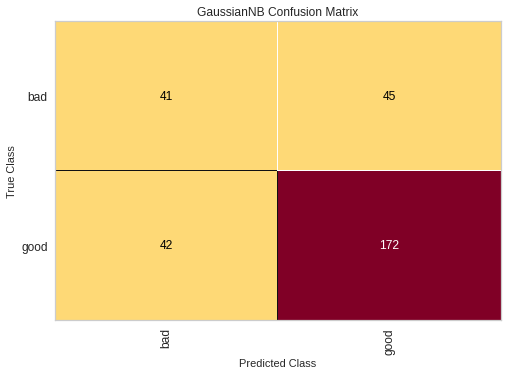

None


In [9]:
# visualiza
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
print(v.score(X_teste, y_teste))
print(v.poof())